In [1]:
import tensorflow

In [1]:
from __future__ import print_function, division, absolute_import

%matplotlib inline

import numpy as np, matplotlib.pyplot as plt
import os, h5py, glob
# Use scikit-learn to grid search the batch size and epochs
from scipy import stats

#%matplotlib inline
#%matplotlib qt 

This purpose of this notebook is to demonstrate the the benefits of increasing the complexity of my model

###  
    def makeModel(input_shape,Nregressparams):
    
        model = Sequential()
        model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1),activation='relu',input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        
<font color='red'>model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))</font>  
<font color='red'>model.add(BatchNormalization())</font>  

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(GlobalAveragePooling2D())
        model.add(Dropout(0.2))
        model.add(Dense(200, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=0.),
                   loss=Mean_Squared_over_true_Error)
        print(model.summary())
        return model


In [2]:
n=0
factor=1000.

#data_path = "/Users/tashaleebillings/Desktop/data/v7/before/"
#data_path = "/Users/tashaleebillings/Desktop/data/v7/after/"
data_path = "/Users/tashaleebillings/Desktop/data/v9/before/"
#data_path = "/Users/tashaleebillings/Desktop/data/v9/after/"
results = glob.glob(data_path+"*.npy")
histories = sorted(glob.glob(data_path+"history_loss_*.npz"))
fold = ["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5","Fold 6","Fold 7","Fold 8","Fold 9","Fold 10"]

### Plot Metrics



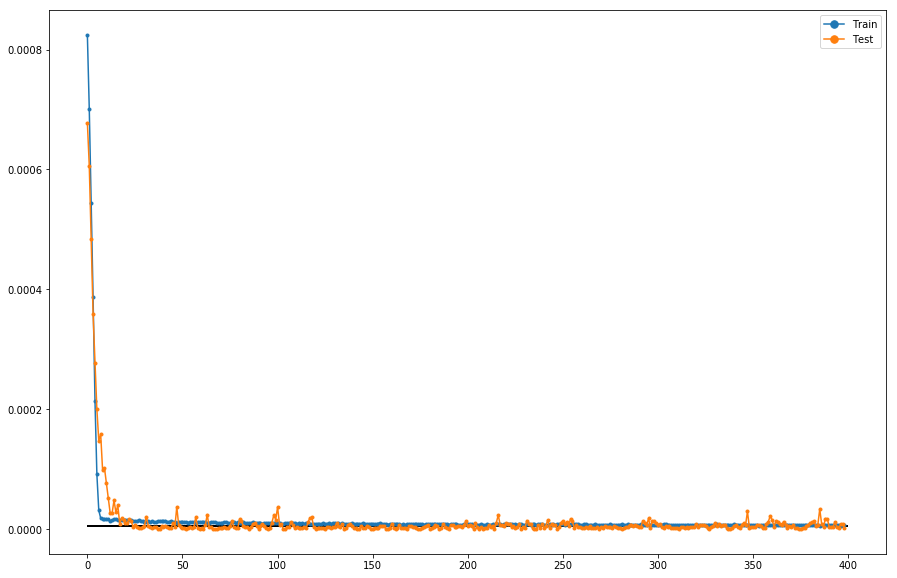

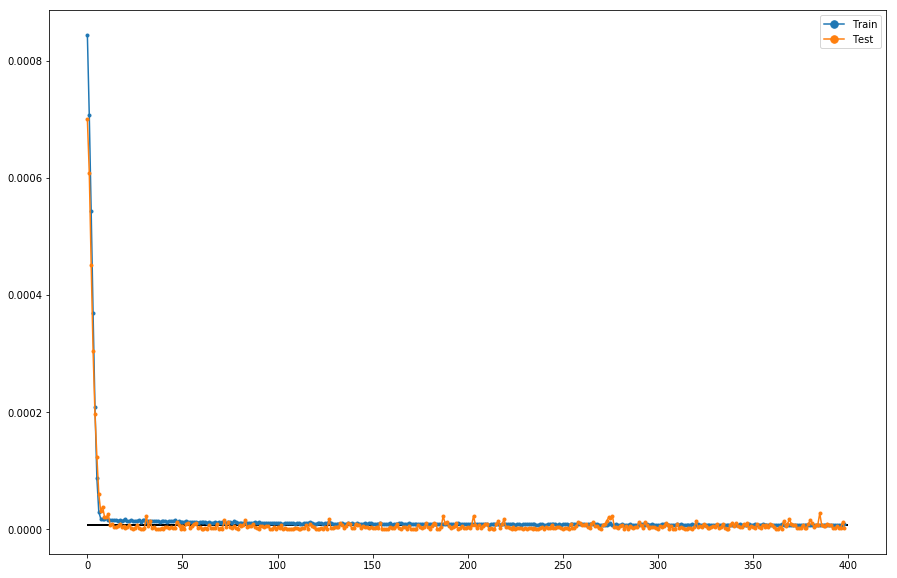

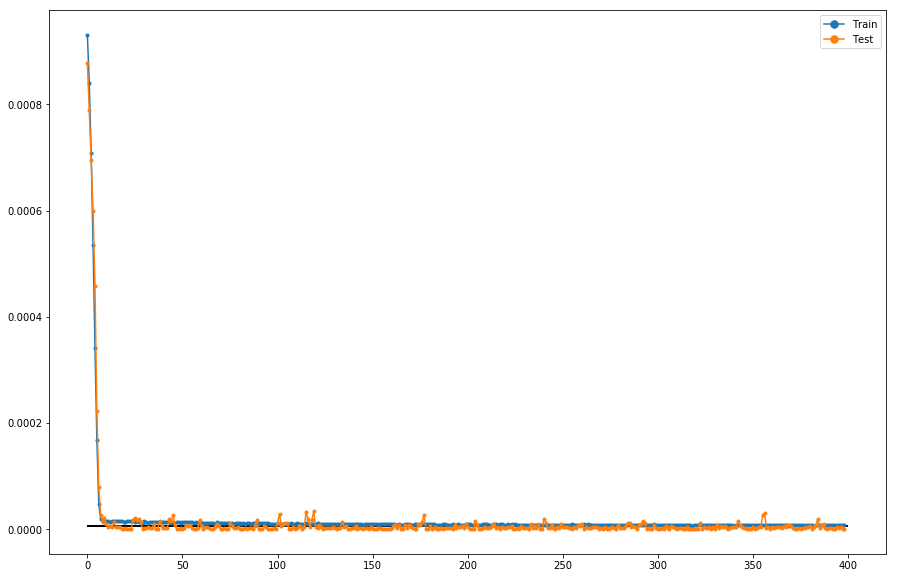

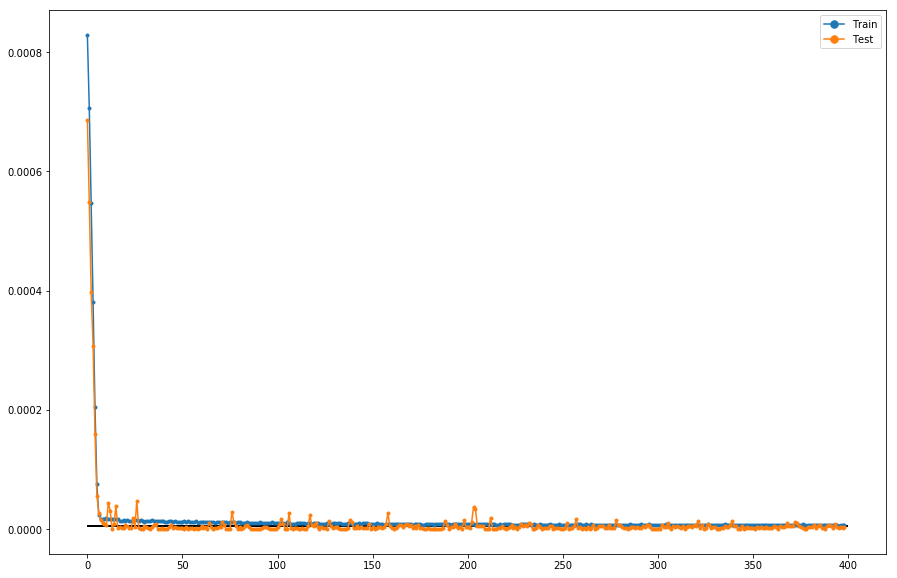

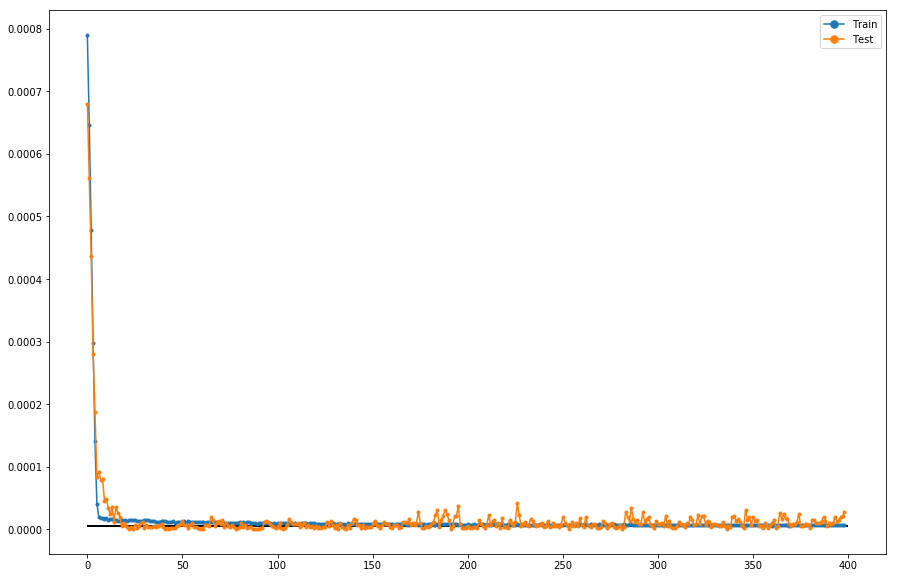

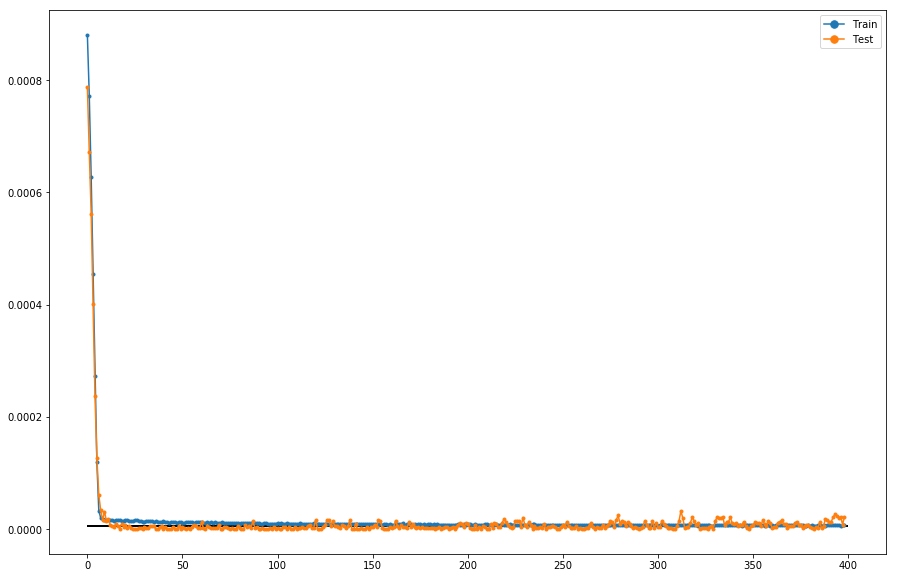

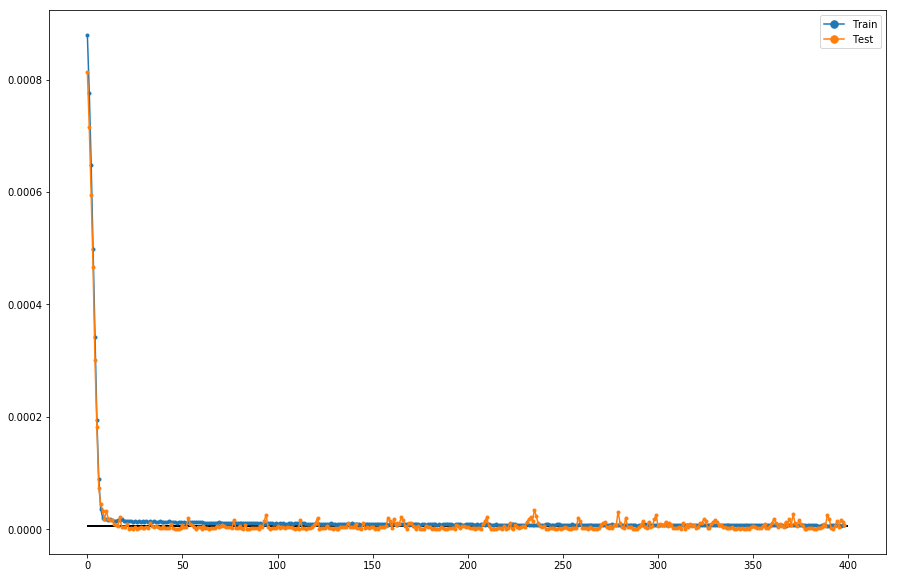

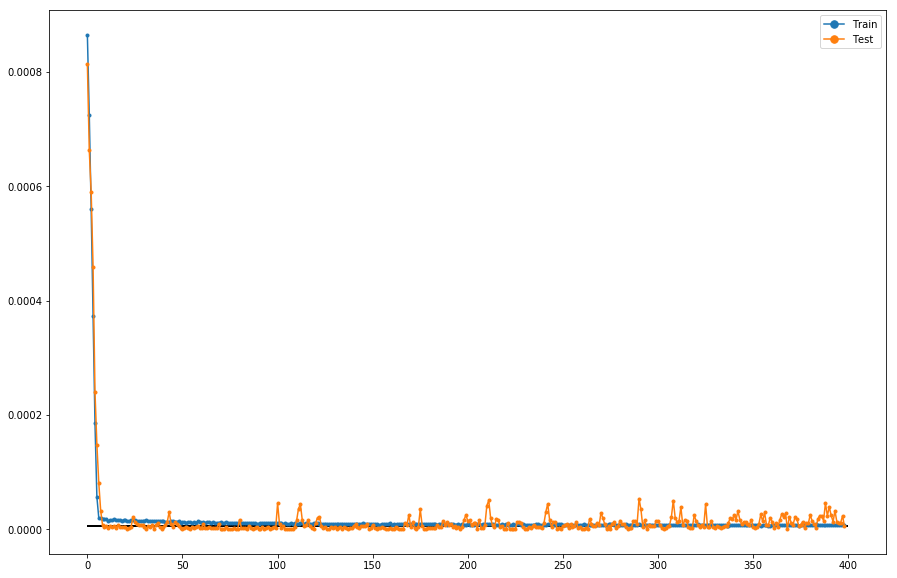

In [80]:

for i in [1,2,3,4,5,6,8,9]:
#for i in np.arange(len(histories)):
    history = sorted(glob.glob(data_path+"history*{}.npz".format(str(i))))
    
    loss = np.load(history[0])['metric']
    val_loss = np.load(history[1])['metric']
    
    plt.figure(figsize=(15,10))
    plt.plot(loss[1:],".-")
    plt.plot(val_loss[1:],".-")
    plt.hlines(loss[1:].min(), 0, 400, colors='k', linestyles='solid', label='', linewidth=2.0)

    plt.legend(['Train', 'Test'], loc='upper right', markerscale=2.5)
    #plt.savefig(data_path+'Loss_Epoch_linearity_{:d}.png'.format(i))
    plt.show()

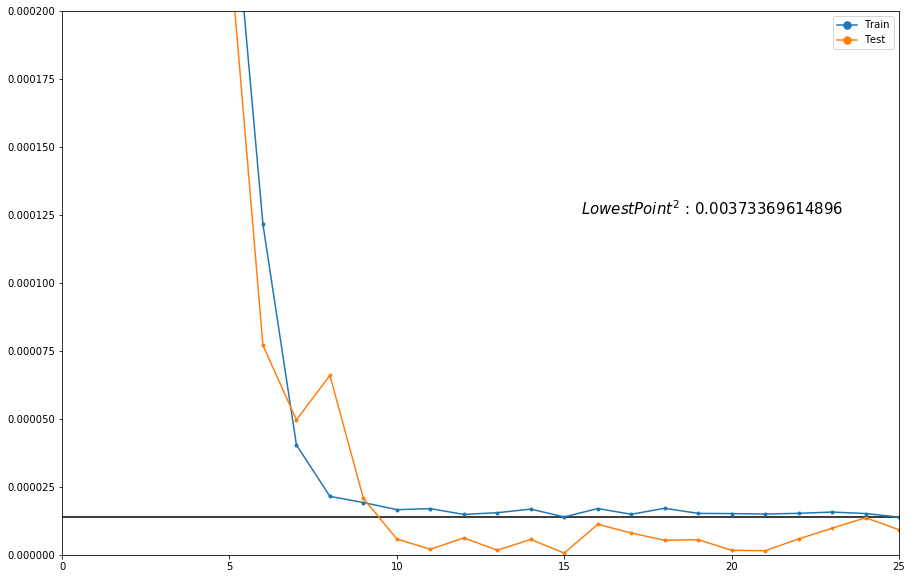

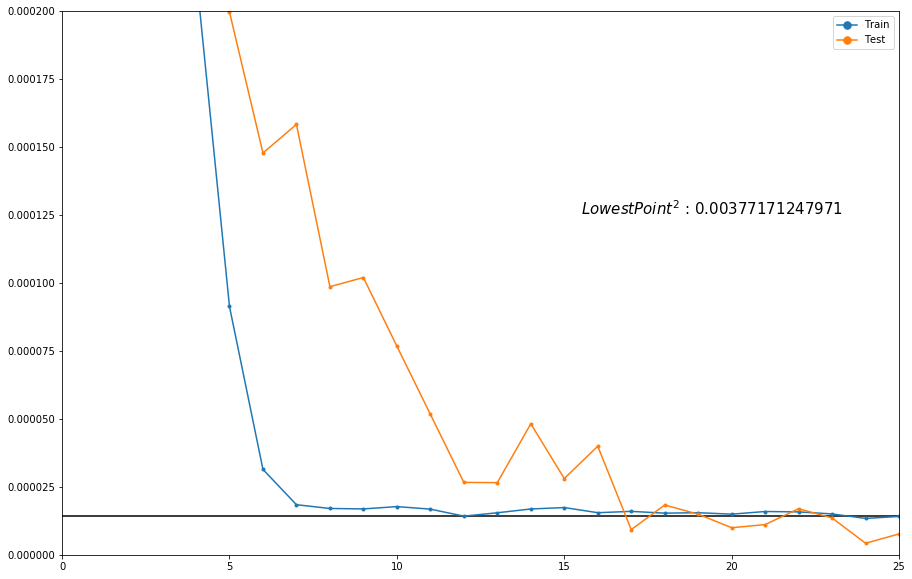

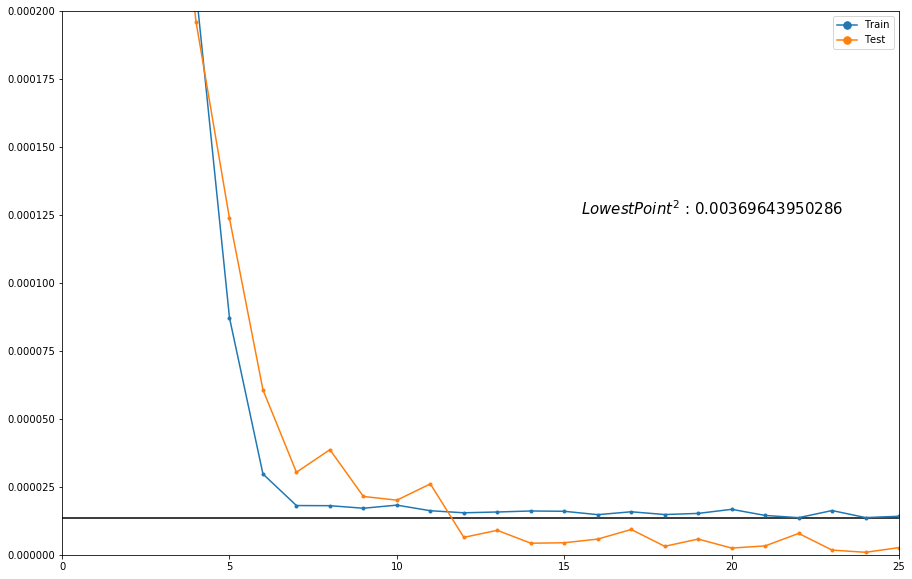

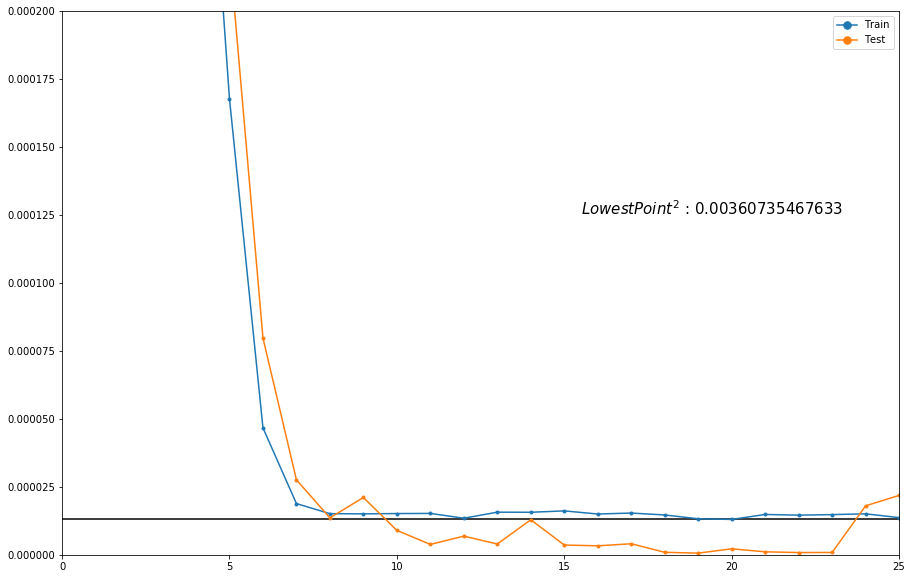

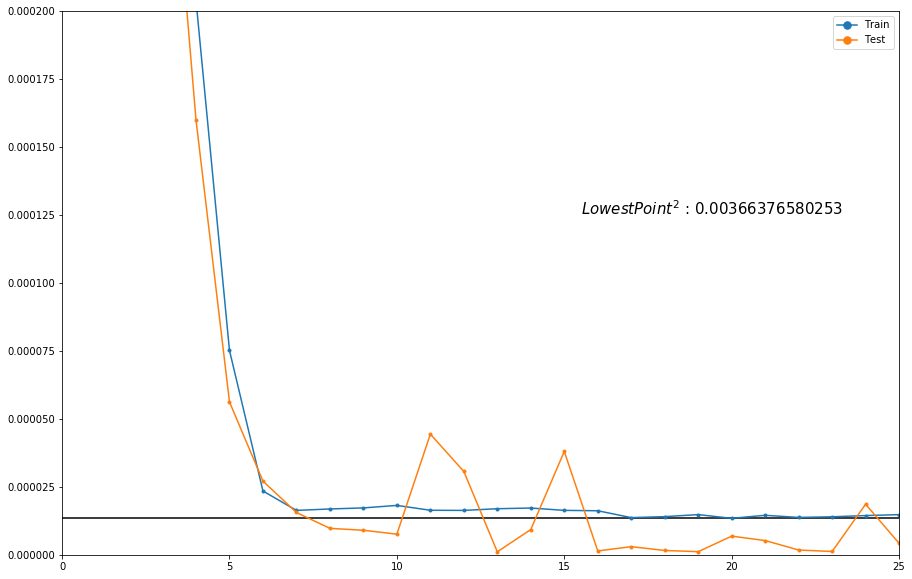

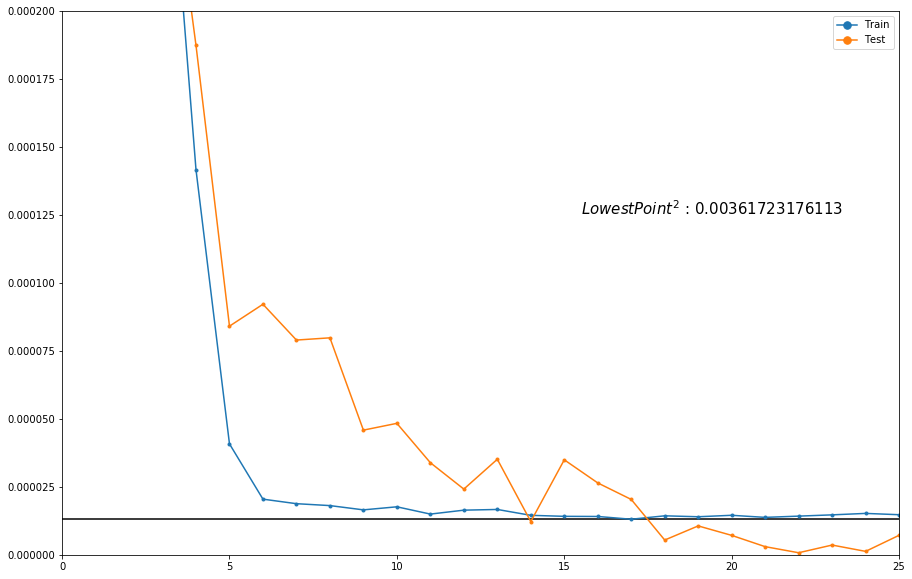

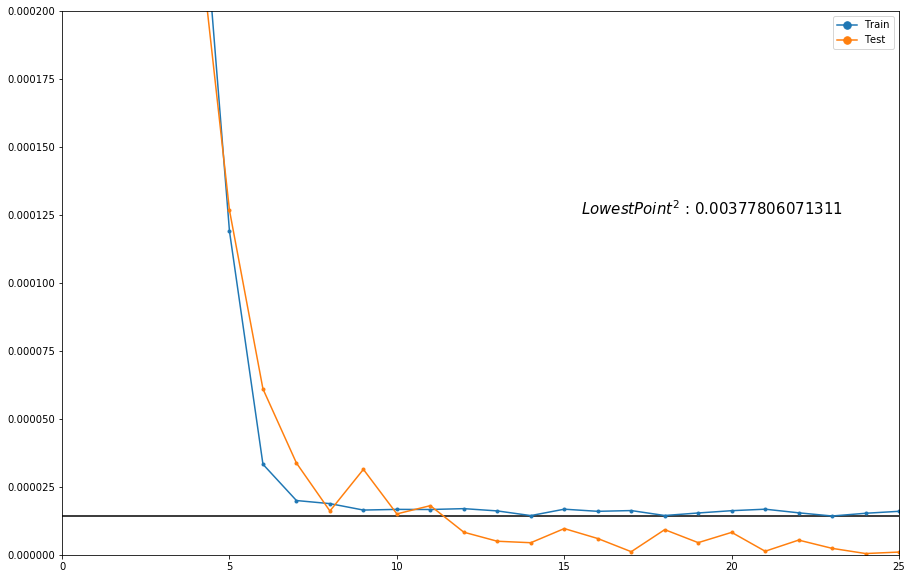

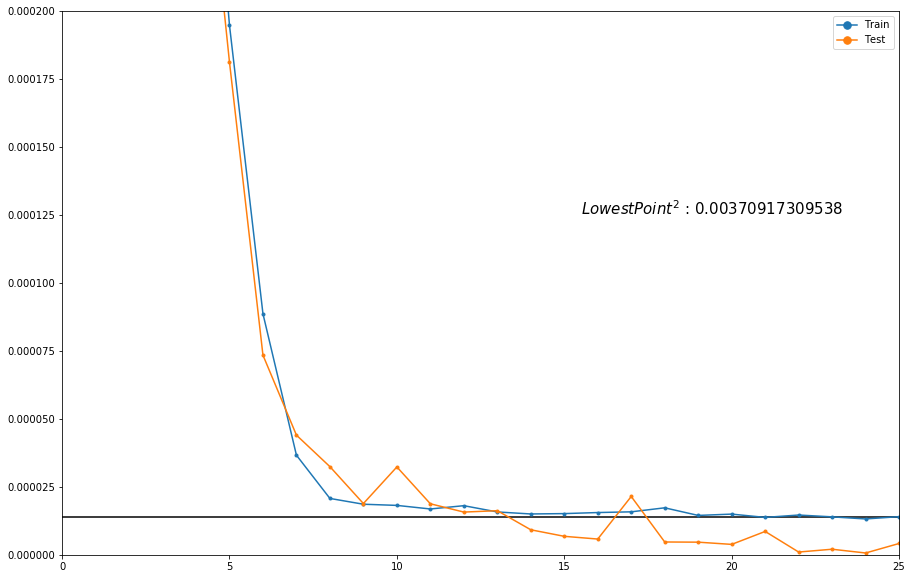

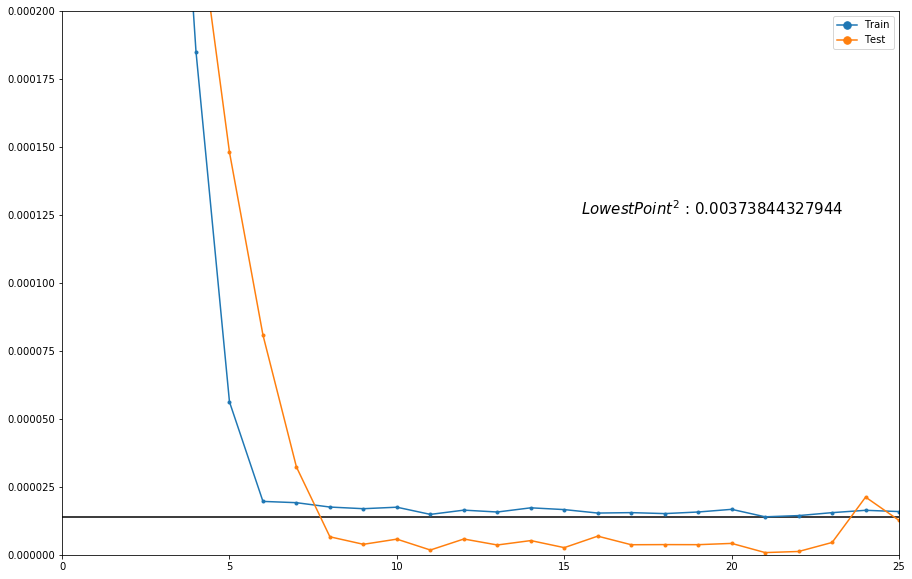

In [81]:
for i in [0,1,2,3,4,5,6,8,9]:
#for i in np.arange(len(histories)):
    history = sorted(glob.glob(data_path+"history*{}.npz".format(str(i))))
    
    loss = np.load(history[0])['metric']
    val_loss = np.load(history[1])['metric']
    
    plt.figure(figsize=(15,10))
    plt.plot(loss[1:],".-")
    plt.plot(val_loss[1:],".-")
    plt.hlines(loss[1:25].min(), 0, 25, colors='k', linestyles='solid', label='')
    plt.xlim(0,25)
    plt.ylim(0,0.0002)
    
    plt.text(15.5, 0.000125, r'${Lowest Point}^2$ : '+str(np.sqrt(loss[1:25].min())), fontsize=15)#,
            #{'color': 'blue', 'fontsize': 10, 'ha': 'center', 'va': 'center'})),
            #'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

    plt.legend(['Train', 'Test'], loc='upper right', markerscale=2.5)
    #plt.savefig(data_path+'Loss_Epoch_linearity_{:d}.png'.format(i))
    plt.show()

<font color='red'>**NOTE: Version 7**</font>  

This is a plot from step 25 - 400 which happens to be the last 375 step of the fold. The thick black line is tracking the smallest loss across the entire data. This is so that we can see that the training loss across different fold continues to decrease until the end but the validation loss behaves differently. It decreases to the point where it out performs the training (**great!**) but then it starts to do poorly and the generalization gap begins to grow. The model is begining to overfits which means that the network is good at learning the training set but cannot generalize beyond that. The model is describing noise instead of the relationships within the data. 

The internet says some symptoms of overfitting are ...  
*Low bias* --> accurate predictions for the training set  
*High variance* -- > poor ability to generate predictions for the validation set

🤔 We see evidence of bias in our results so why does this "well behaved" training loss seem to contradict this???

The second thing to notice is how "stocastic" the validation loss behaves over ~375 steps and that it hold this throughout. The data is split (train/validation/test) 720/80/200. So if we are validating the model at ever step after doing batch training on 32 data images in the traing set, is the NN randomly selecting a single data image at each step to validate the model? If so I cannont see a way to lower how much the loss varies from step to step during the validation process. I want to give it more data...but...

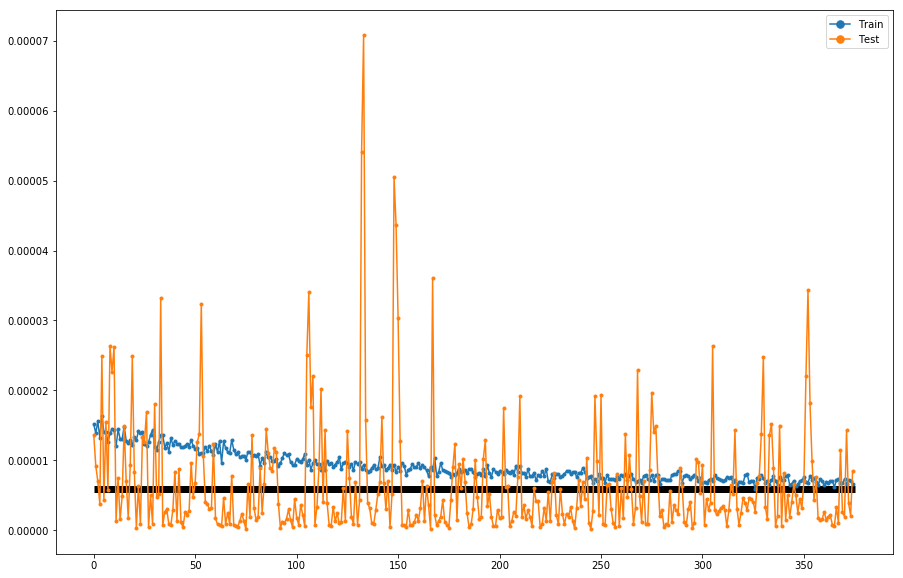

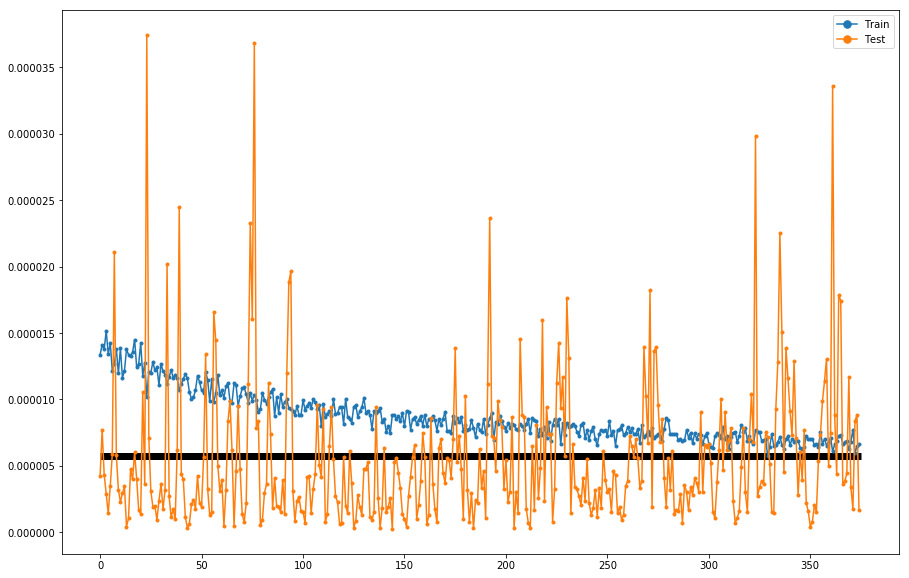

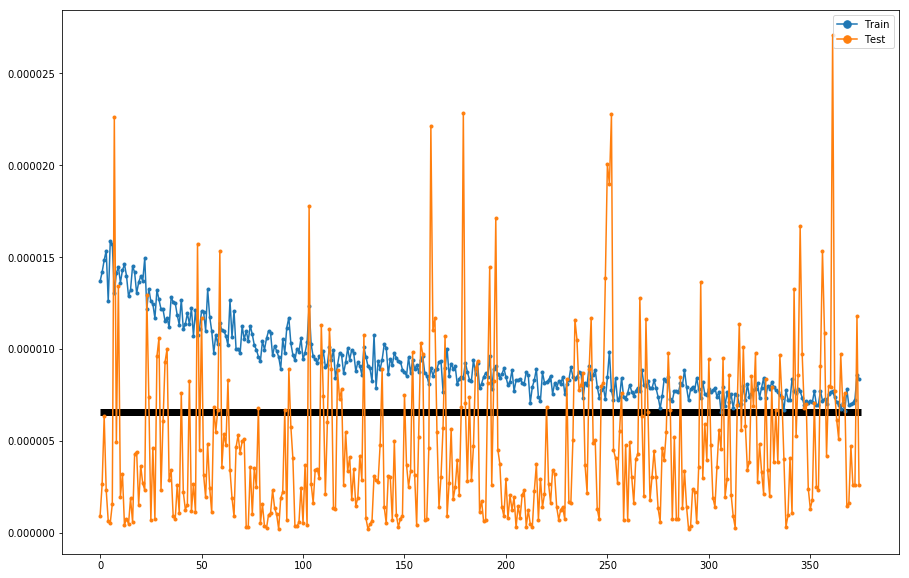

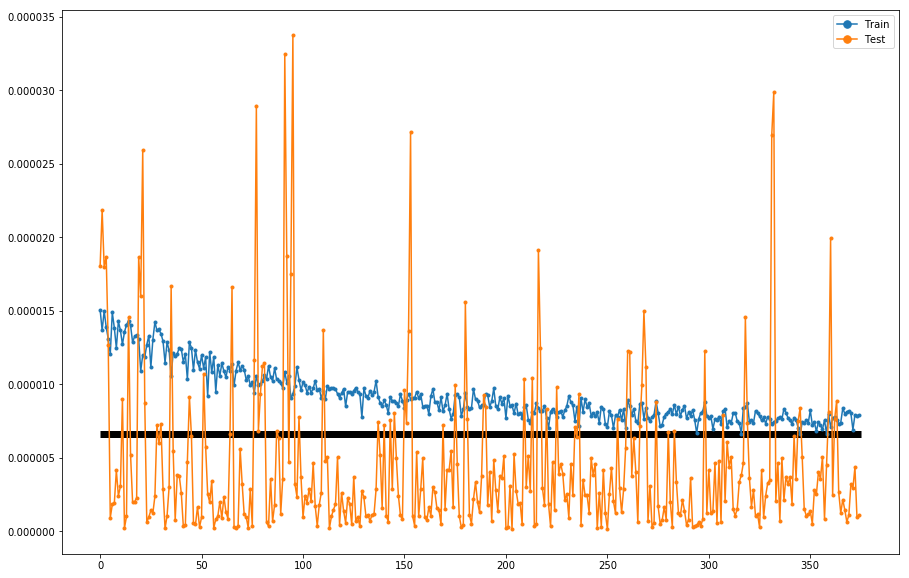

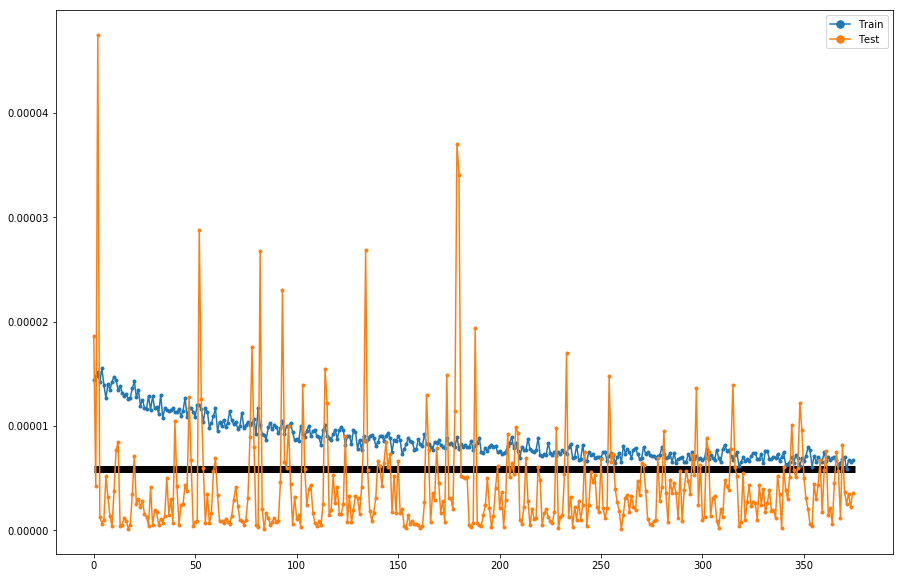

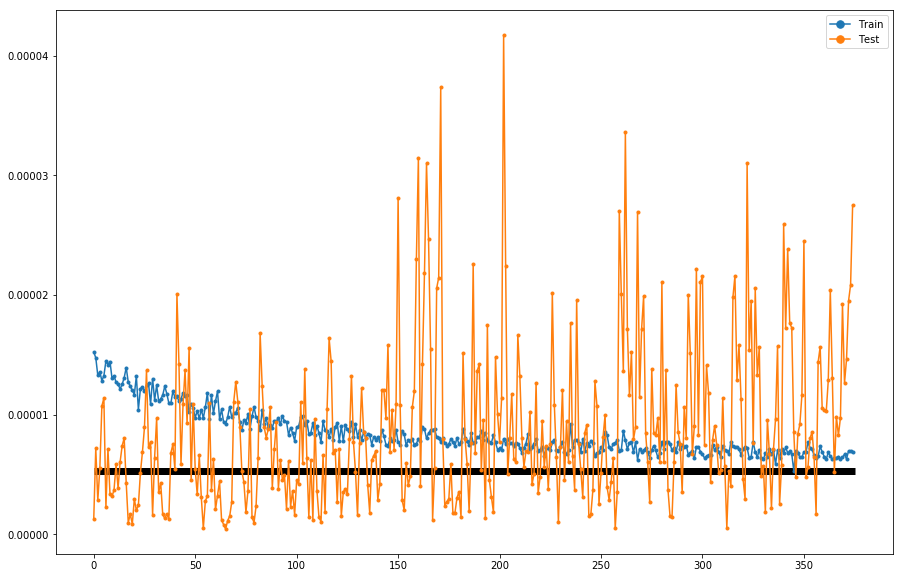

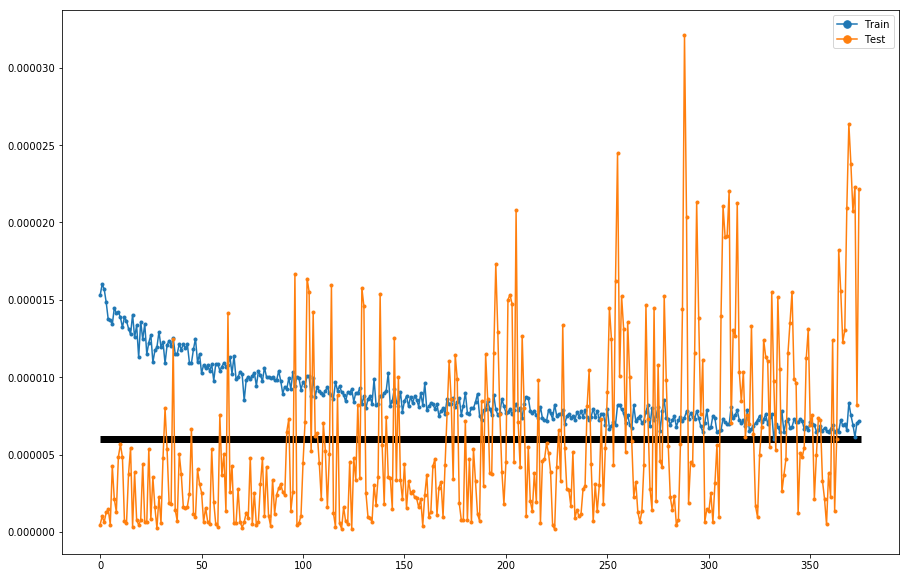

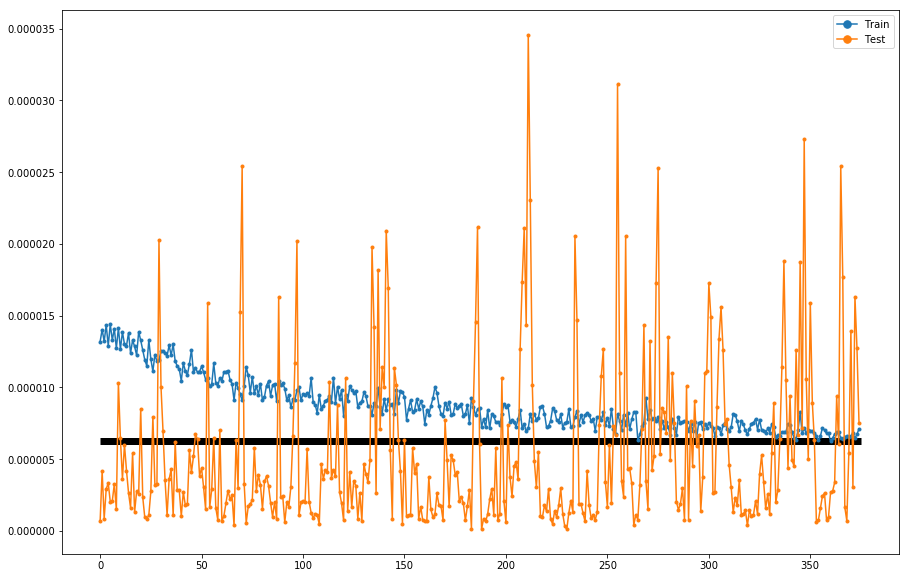

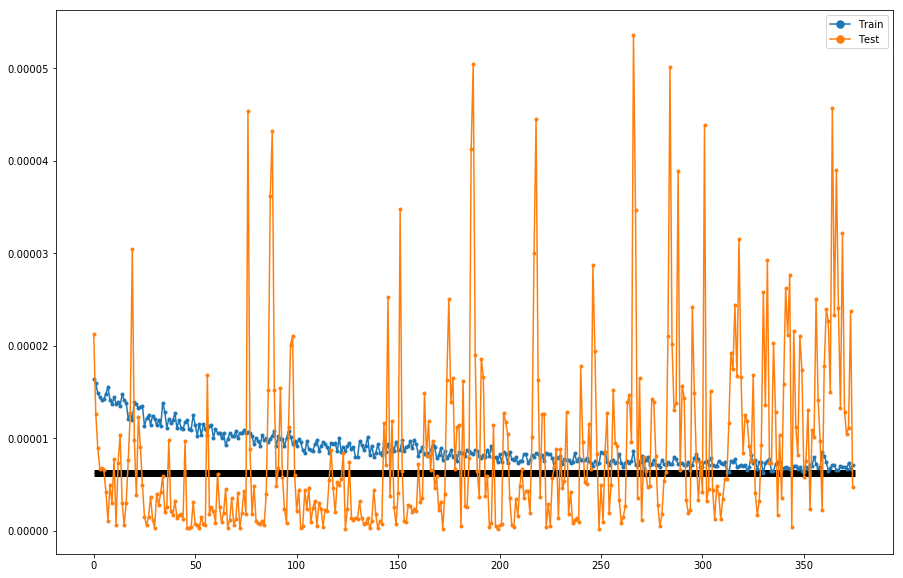

In [82]:
for i in [0,1,2,3,4,5,6,8,9]:
#for i in np.arange(len(histories)):
    history = sorted(glob.glob(data_path+"history*{}.npz".format(str(i))))
    
    loss = np.load(history[0])['metric']
    val_loss = np.load(history[1])['metric']
    
    plt.figure(figsize=(15,10))
    plt.plot(loss[25:],".-")
    plt.plot(val_loss[25:],".-")
    plt.hlines(loss[1:].min(), 0, 375, colors='k', linestyles='solid', label='', linewidth=7.0)

    plt.legend(['Train', 'Test'], loc='upper right', markerscale=2.5)
    #plt.savefig(data_path+'Loss_Epoch_linearity_{:d}.png'.format(i))
    plt.show()

### Plot Prediction and Relative Difference

/Users/tashaleebillings/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


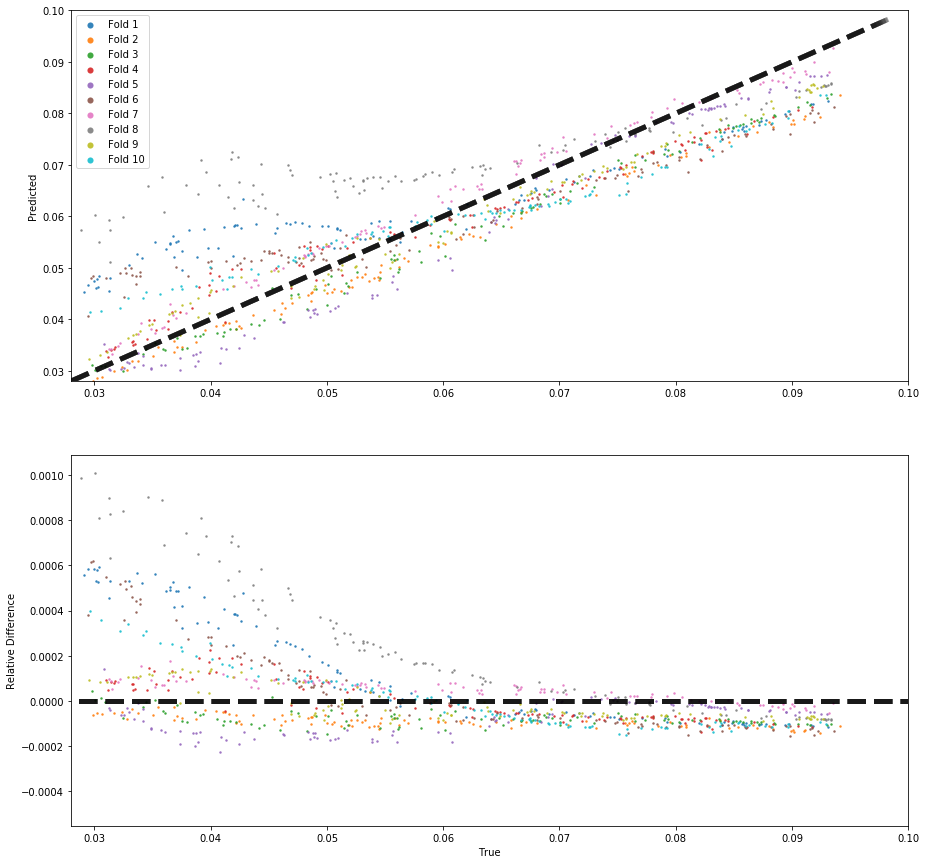

In [3]:
%matplotlib inline

fig, axes = plt.subplots(figsize=(15,15),nrows=2, ncols=1, sharex=False, sharey=False)
for r, res in enumerate(results):
    #load reaults
    result=np.load(res)

    axes[0].scatter(result["truth"][:,n]/factor, result["prediction"][:,n]/factor,
    s=6, lw=0, alpha=0.9, label=fold[r])
    x = np.linspace(0.95*np.min(result["truth"][:,n]/factor),
                    1.05*np.max(result["truth"][:,n]/factor), 1000)
    axes[0].plot(x, x, 'k--',lw=5,alpha=0.2)


    axes[1].plot(x-x, 'k--',lw=5,alpha=0.2)
    relative_error = (result["prediction"][:,n]/factor-result["truth"][:,n]/factor)/result["truth"][:,n]
    axes[1].scatter(result["truth"][:,n]/factor, relative_error,s=6, lw=0, alpha=0.9, label=fold[r])

axes[1].set_xlabel('True')
axes[0].set_xlim(0.03,0.18)
axes[1].set_xlim(0.03,0.18)
axes[0].set_xscale('linear')
axes[1].set_xscale('linear')

axes[0].set_ylabel('Predicted')
axes[0].set_ylim(0.028,0.1)
axes[1].set_ylabel('Relative Difference')
axes[0].set_yscale('linear')
axes[1].set_yscale('linear')

axes[0].legend(markerscale=2.5)
plt.show()
#plt.savefig(data_path+"results_logScale.png")

In [16]:
pwd

'/Users/tashaleebillings/Desktop/Research/ML/notebooks'

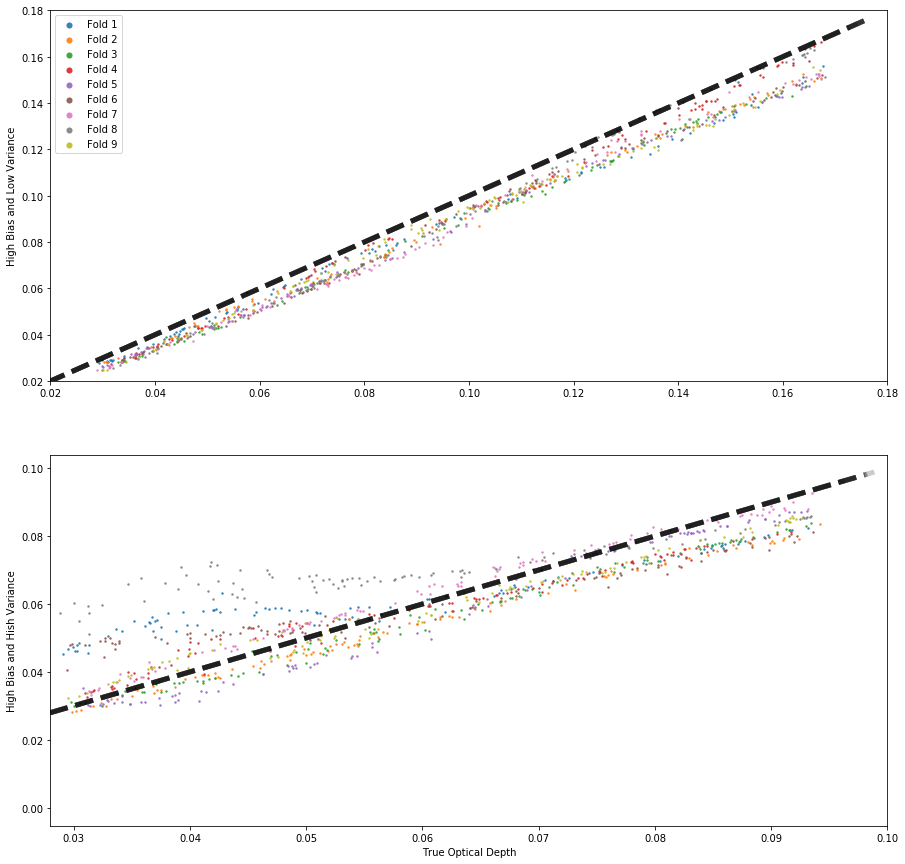

In [18]:
%matplotlib inline

data_path1 = "/Users/tashaleebillings/Desktop/data/v7/before/"
data_path2 = "/Users/tashaleebillings/Desktop/data/v9/before/"

results1 = glob.glob(data_path1+"*.npy")
results2 = glob.glob(data_path2+"*.npy")

fold = ["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5","Fold 6","Fold 7","Fold 8","Fold 9","Fold 10"]


fig, axes = plt.subplots(figsize=(15,15),nrows=2, ncols=1, sharex=False, sharey=False)
for r in range(9):
    #load reaults
    result1=np.load(results1[r])
    result2=np.load(results2[r])

    axes[0].scatter(result1["truth"][:,n]/factor, result1["prediction"][:,n]/factor,
                    s=6, lw=0, alpha=0.9, label=fold[r])
    x = np.linspace(0.95*np.min(result1["truth"][:,n]/factor),
                    1.05*np.max(result1["truth"][:,n]/factor), 1000)
    axes[0].plot(x, x, 'k--',lw=5,alpha=0.2)

    x = np.linspace(0.95*np.min(result2["truth"][:,n]/factor),
                    1.05*np.max(result2["truth"][:,n]/factor), 1000)
    axes[1].plot(x, x, 'k--',lw=5,alpha=0.2)
    axes[1].scatter(result2["truth"][:,n]/factor, result2["prediction"][:,n]/factor,
                    s=6, lw=0, alpha=0.9, label=fold[r])

axes[1].set_xlabel('True Optical Depth')
axes[0].set_xlim(0.02,0.18)
axes[1].set_xlim(0.028,0.1)
axes[0].set_xscale('linear')
axes[1].set_xscale('linear')

axes[0].set_ylabel('High Bias and Low Variance')
axes[1].set_ylabel('High Bias and Hish Variance')
axes[0].set_ylim(0.02,0.18)
#axes[1].set_ylabel('Relative Difference')
axes[0].set_yscale('linear')
axes[1].set_yscale('linear')

axes[0].legend(markerscale=2.5)
plt.savefig("/Users/tashaleebillings/Desktop/bias_variance.png")
plt.show()

### Plot of Estimated Coefficients

Estimated coefficients:
b_0 = -0.00260793116083         
b_1 = 0.961085668022


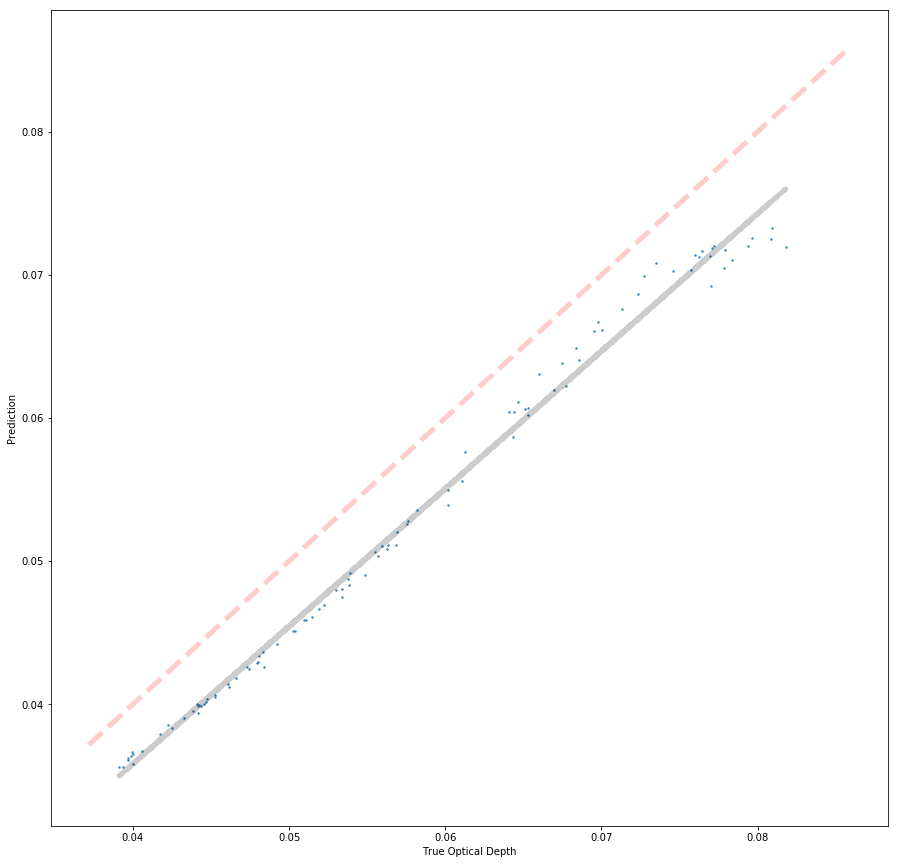

Estimated coefficients:
b_0 = 0.00097278368686         
b_1 = 0.916537066156


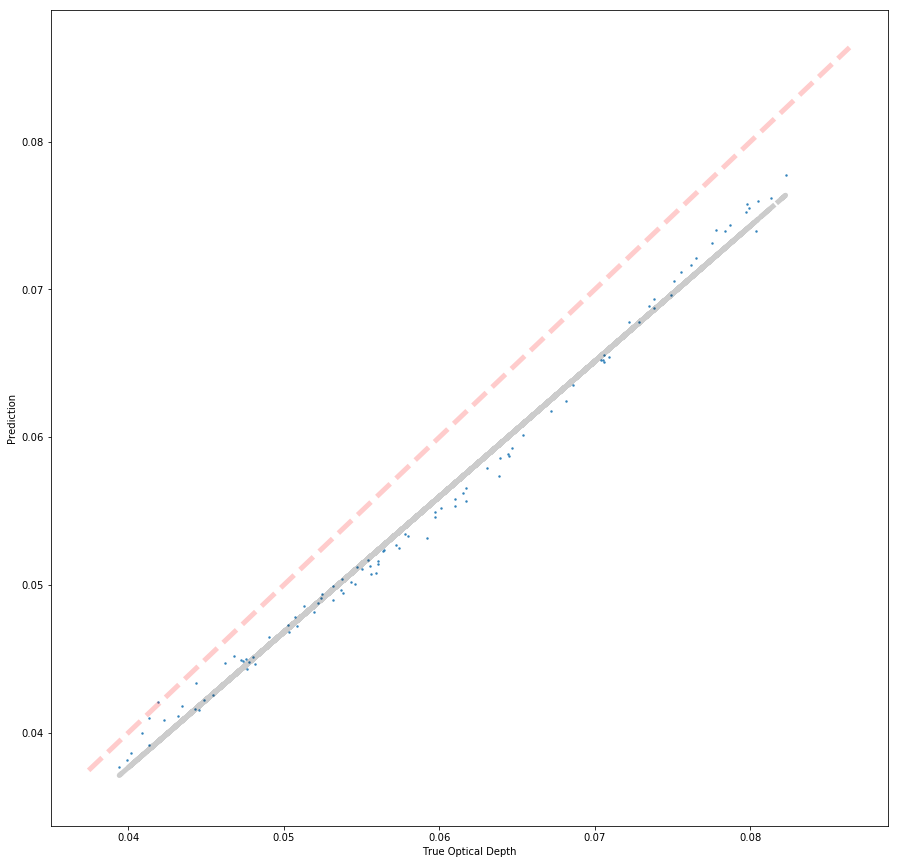

Estimated coefficients:
b_0 = 0.00359057305966         
b_1 = 0.889027941296


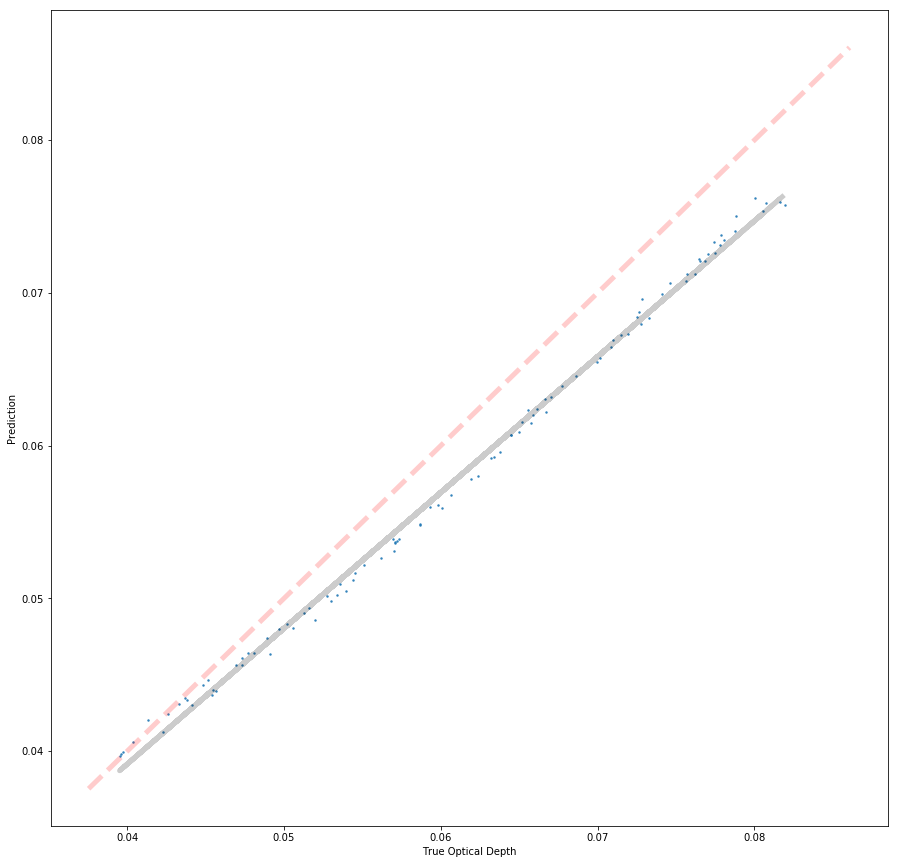

Estimated coefficients:
b_0 = 0.00092324357405         
b_1 = 0.9511646797


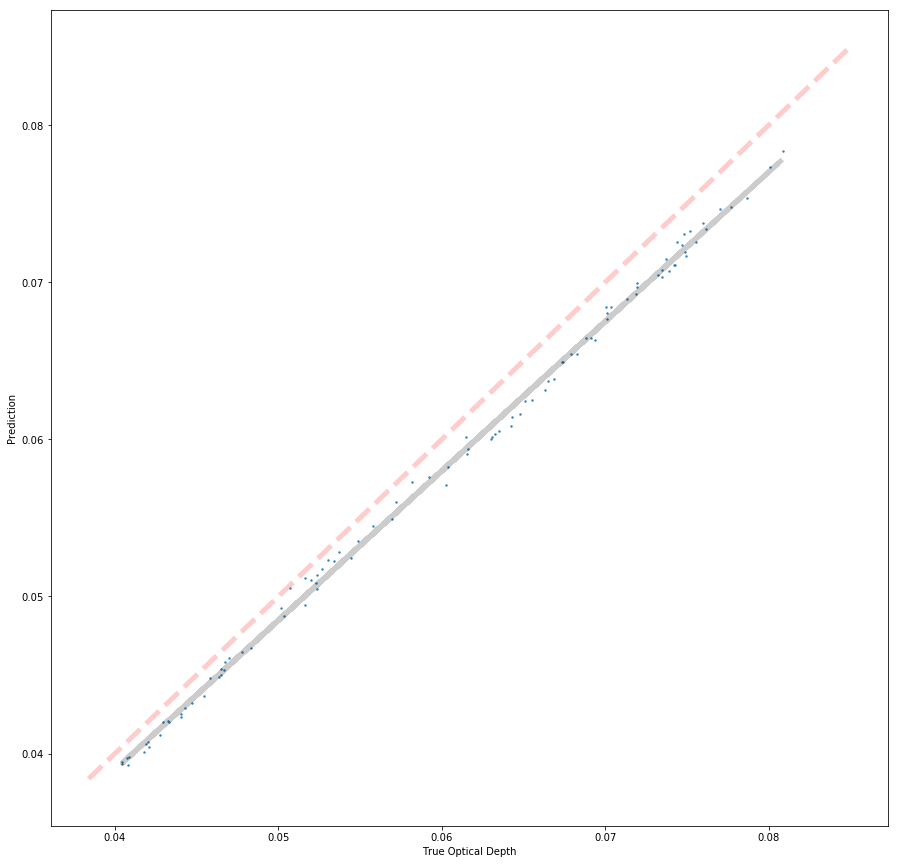

Estimated coefficients:
b_0 = 0.00975658319088         
b_1 = 0.85114188901


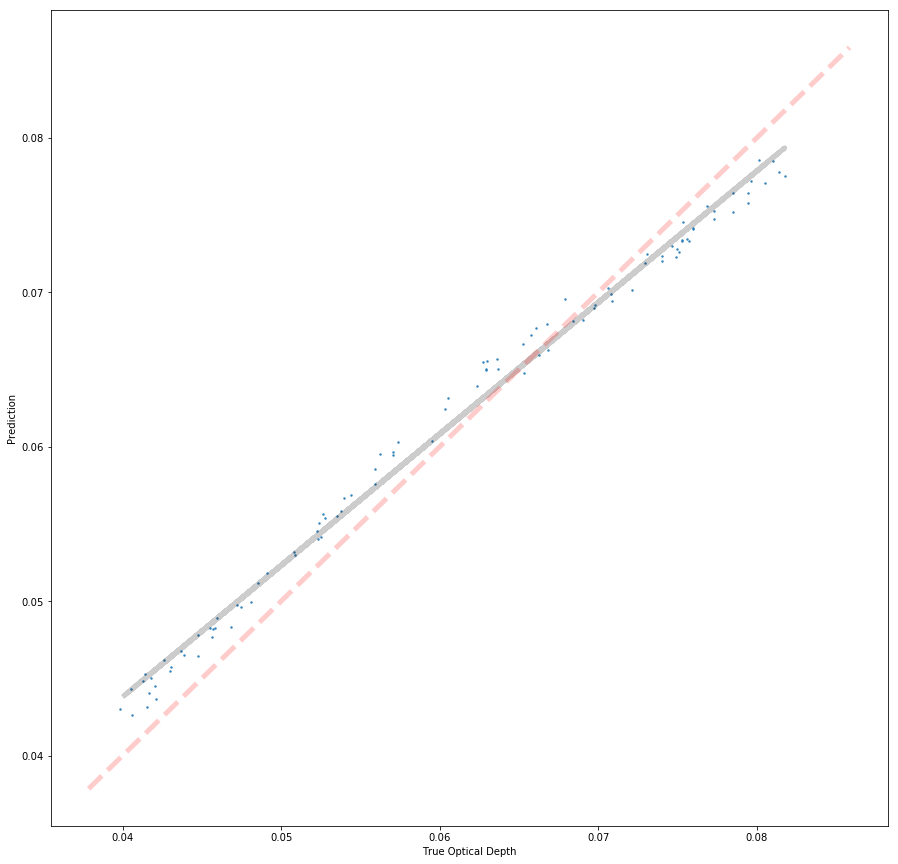

Estimated coefficients:
b_0 = -0.00177626566455         
b_1 = 0.943826773238


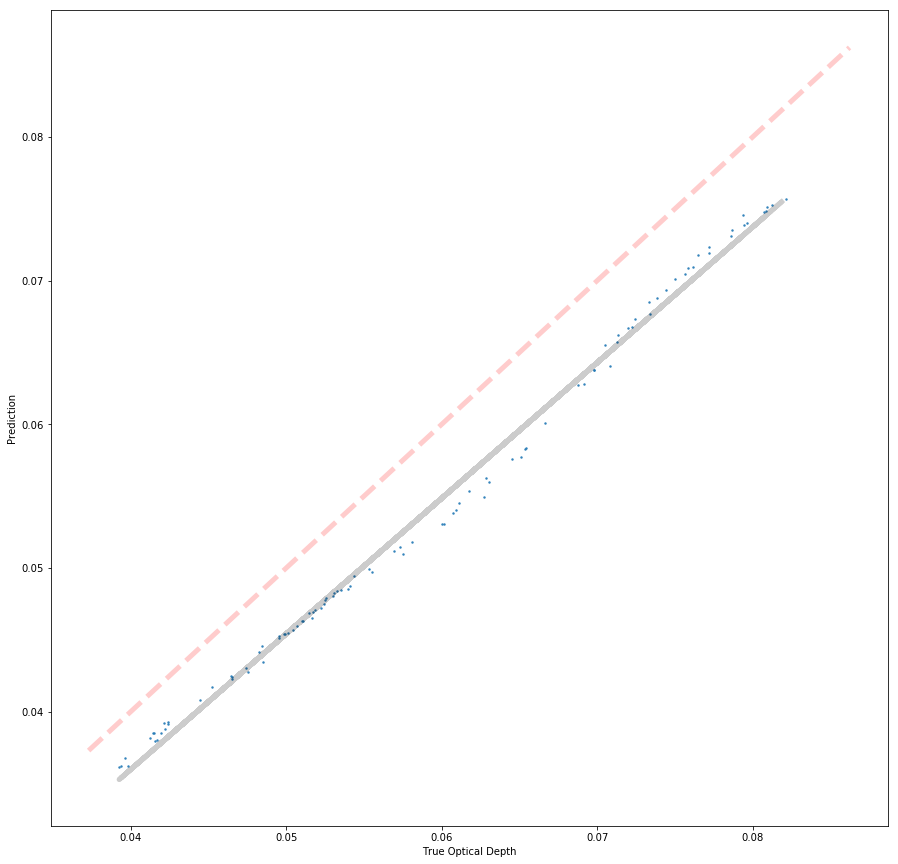

Estimated coefficients:
b_0 = 0.00423232160881         
b_1 = 0.869476154114


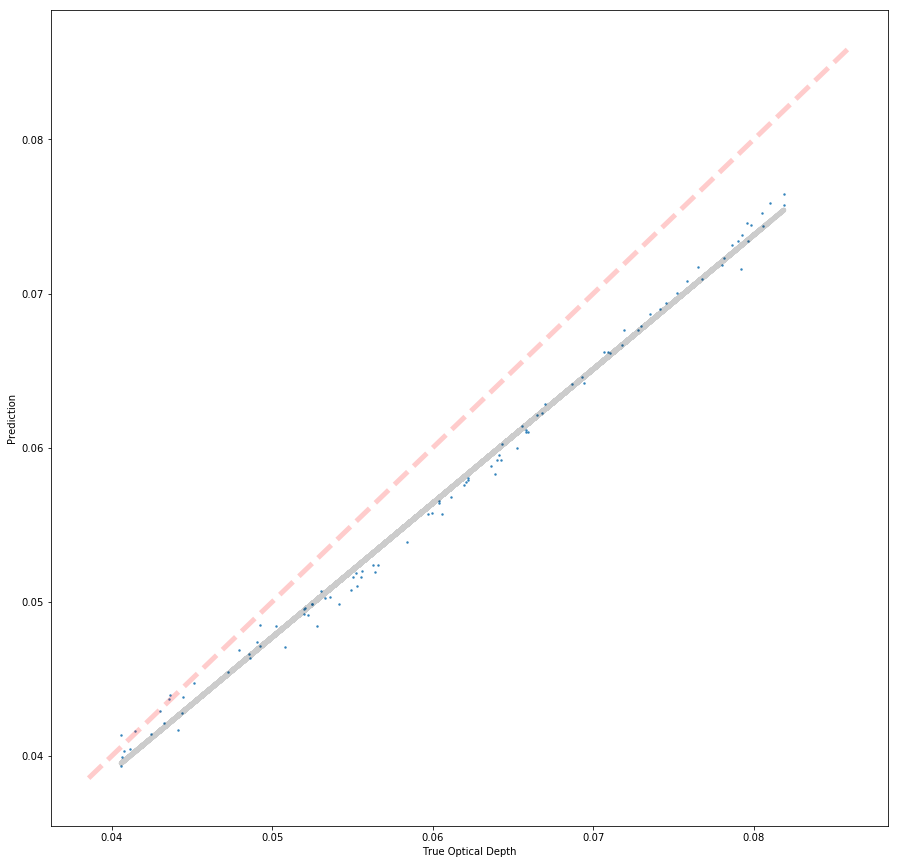

Estimated coefficients:
b_0 = -0.000957468786346         
b_1 = 0.851306558604


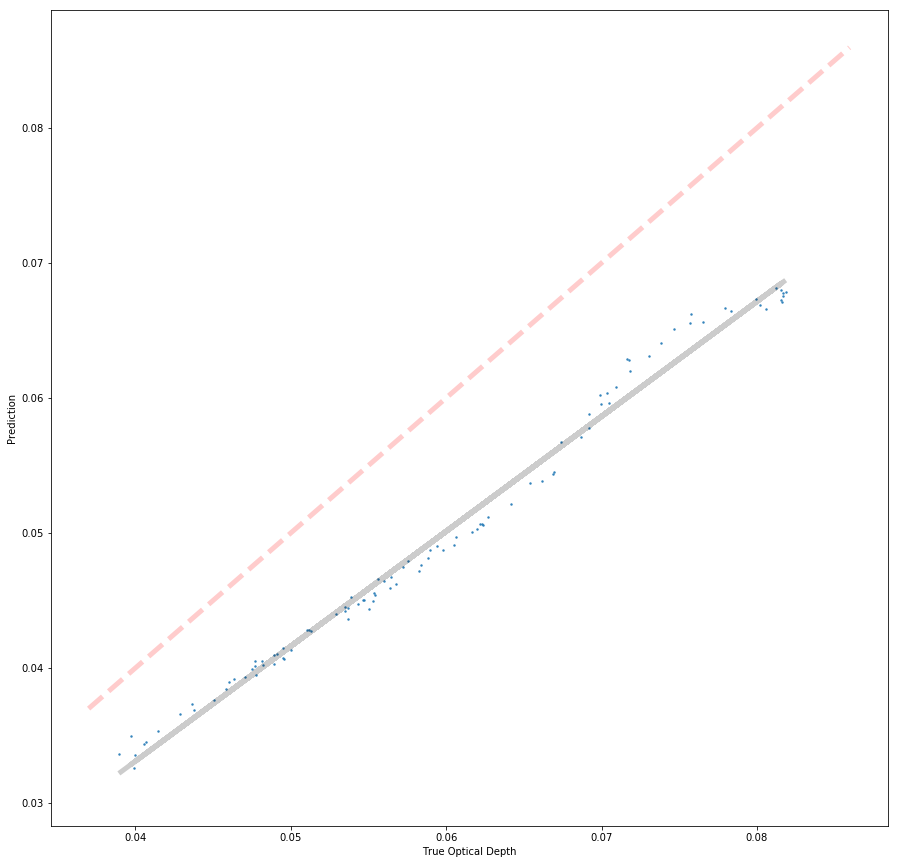

Estimated coefficients:
b_0 = 0.00168316824959         
b_1 = 0.820712446155


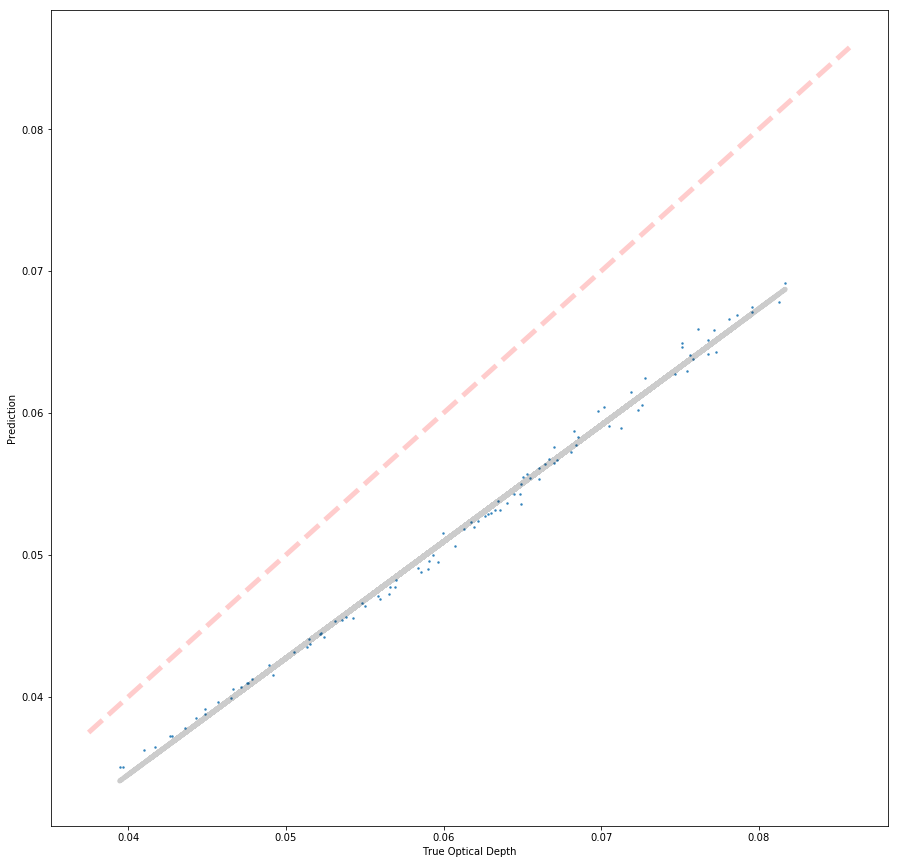

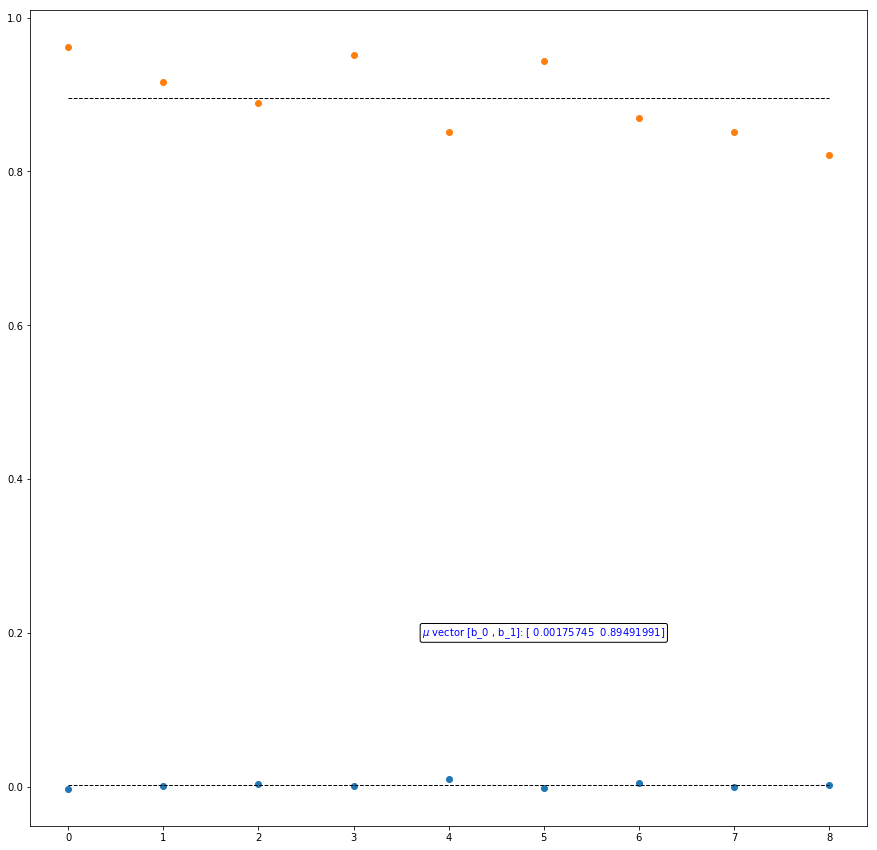

In [84]:
coefficients = []

fp = open(data_path+"estimated_coefficients.log", 'w+')
fp.write("b_0, b_1 \n")

def read_results(filename):

    #read in file
    result=np.load(filename)
    truth = (result["truth"][:,n]/factor)[:5*20]
    prediction = (result["prediction"][:,n]/factor)[:5*20]

    return [truth, prediction]


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return [b_0, b_1]
    
def plot_regression(x, y, b, fold):
    # plotting the actual points as scatter plot
    plt.figure(figsize=(15,15))
    plt.scatter(x,y, s=6, lw=0, alpha=0.9)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, 'k--',lw=5,alpha=0.2)
    
    # Plot trendline
    xx = np.linspace(0.95*np.min(x), 1.05*np.max(x), 1000)
    plt.plot(xx, xx, 'r--',lw=5,alpha=0.2)

    # putting labels
    plt.xlabel('True Optical Depth')
    plt.ylabel('Prediction')

    # Show plot
    plt.show()
 
# Plot Slope distribution
def statistics_plot_coef(coefficient):
    coefficients = np.array(coefficient,dtype=np.float64)
    
    plt.figure(figsize=(15,15))
    plt.plot(coefficients,'o')
    mean_value = np.mean(coefficients,axis=0)
    mean = np.zeros_like(coefficients)
    mean[:,0]=mean_value[0]
    mean[:,1]=mean_value[1]
    plt.plot(mean,'k--',lw=1)
    plt.text(5.0, 0.2, r'$\mu$ vector [b_0 , b_1]: '+str(mean_value),
            {'color': 'blue', 'fontsize': 10, 'ha': 'center', 'va': 'center',
            'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    
    plt.show()
    

def main(filename,fold):
    # Read in observations
    x = read_results(filename)[0]
    y = read_results(filename)[1]

    # estimating coefficients
    b = estimate_coef(x, y)
    coefficents.append(b)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))
        
    # write the coefficients to some text file
    fp.write(str(b)+"\n")

    # plotting regression line
    plot_regression(x, y, b, fold)
    return

if __name__ == "__main__":

    for r, res in enumerate(results):
        main(filename=res,fold=r)
    fp.close()
    statistics_plot_coef(coefficient=coefficients)


### Plot Bin Statistics

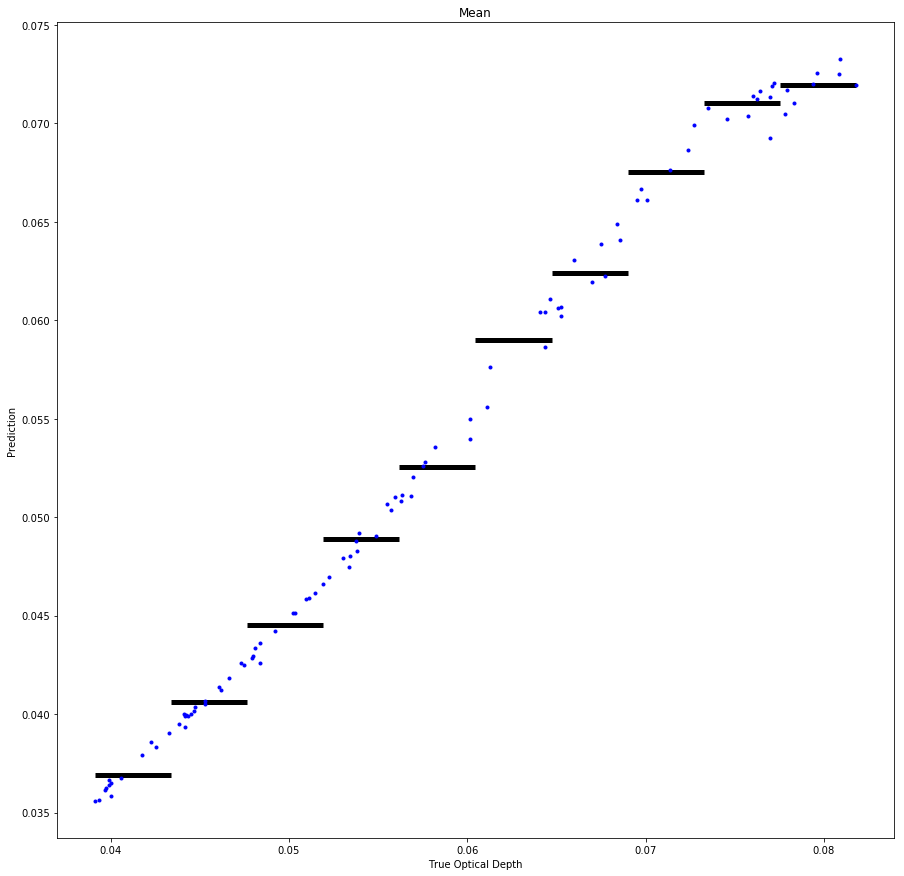

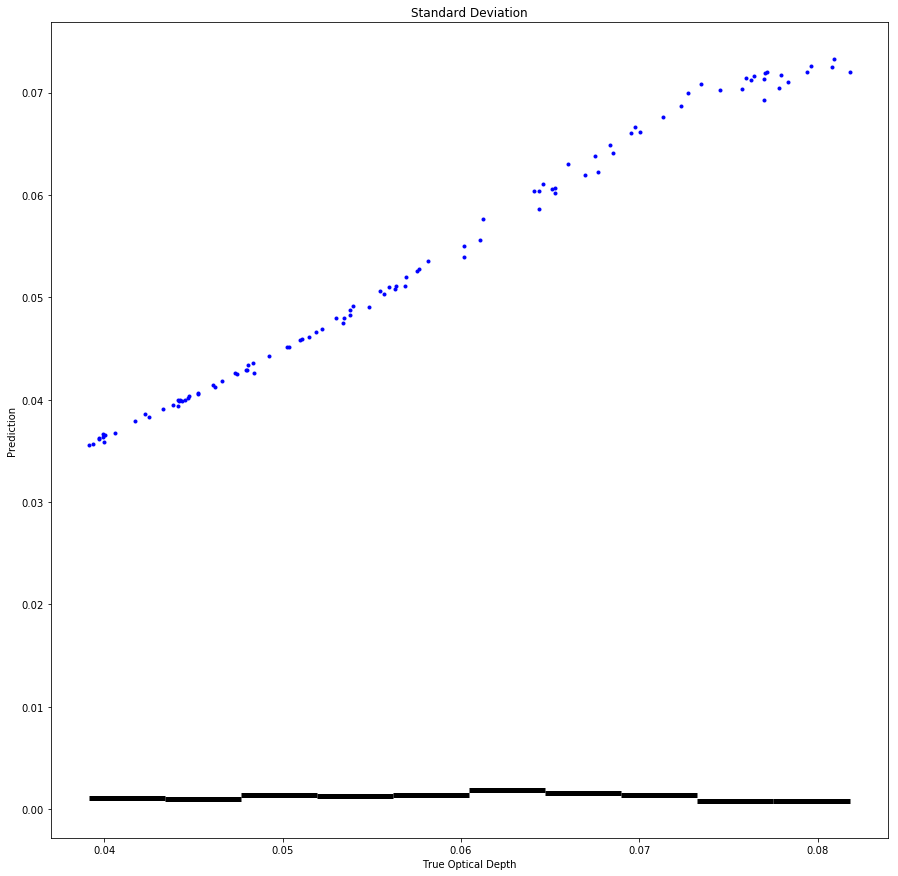

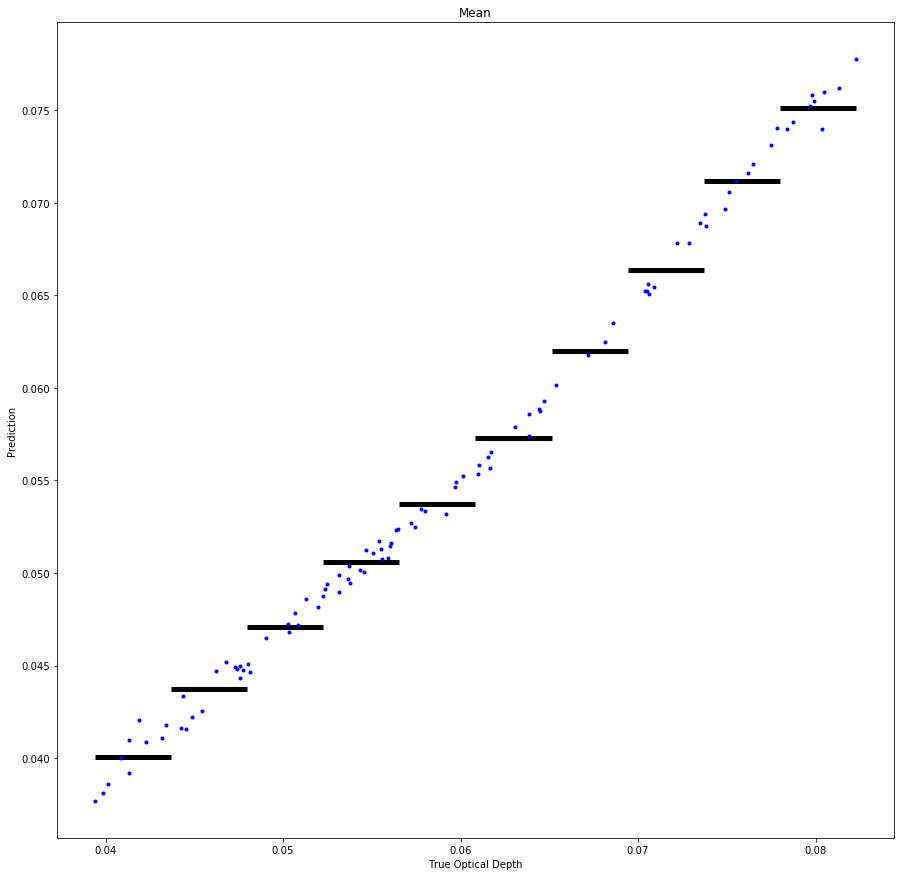

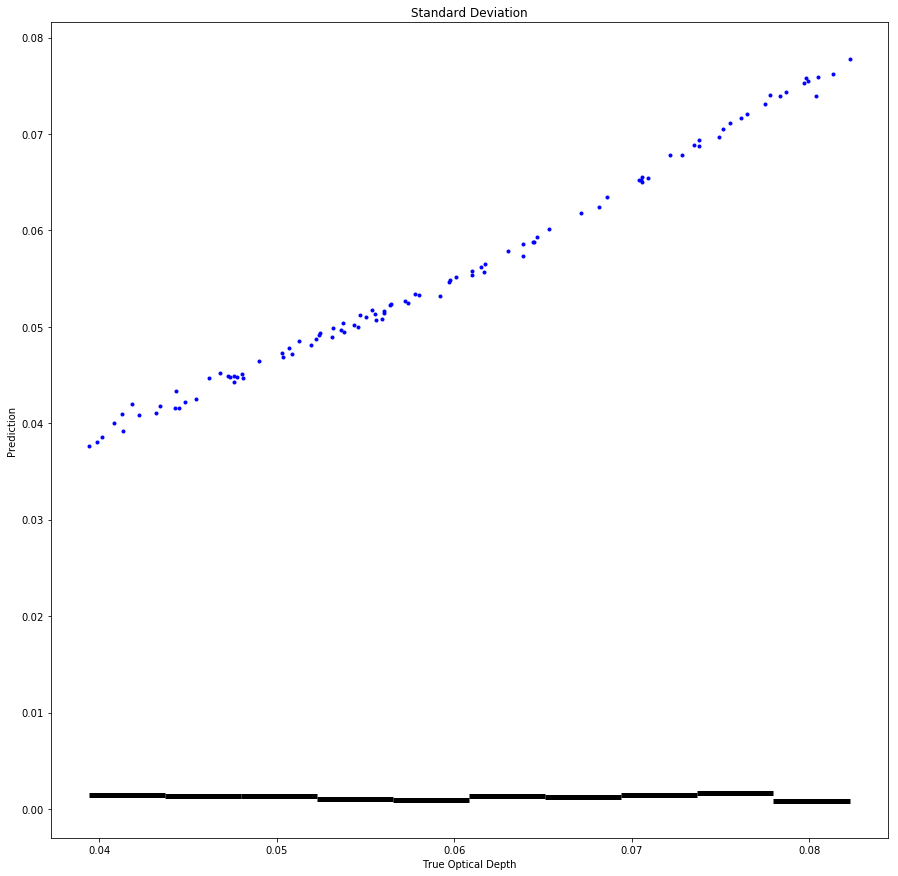

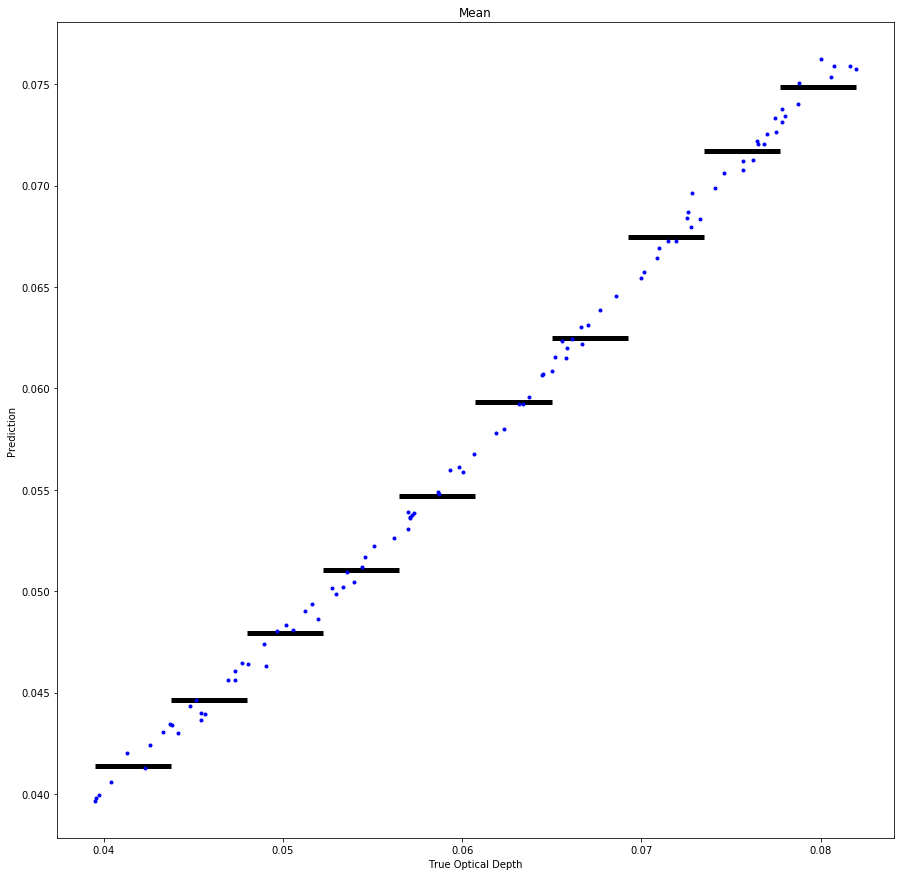

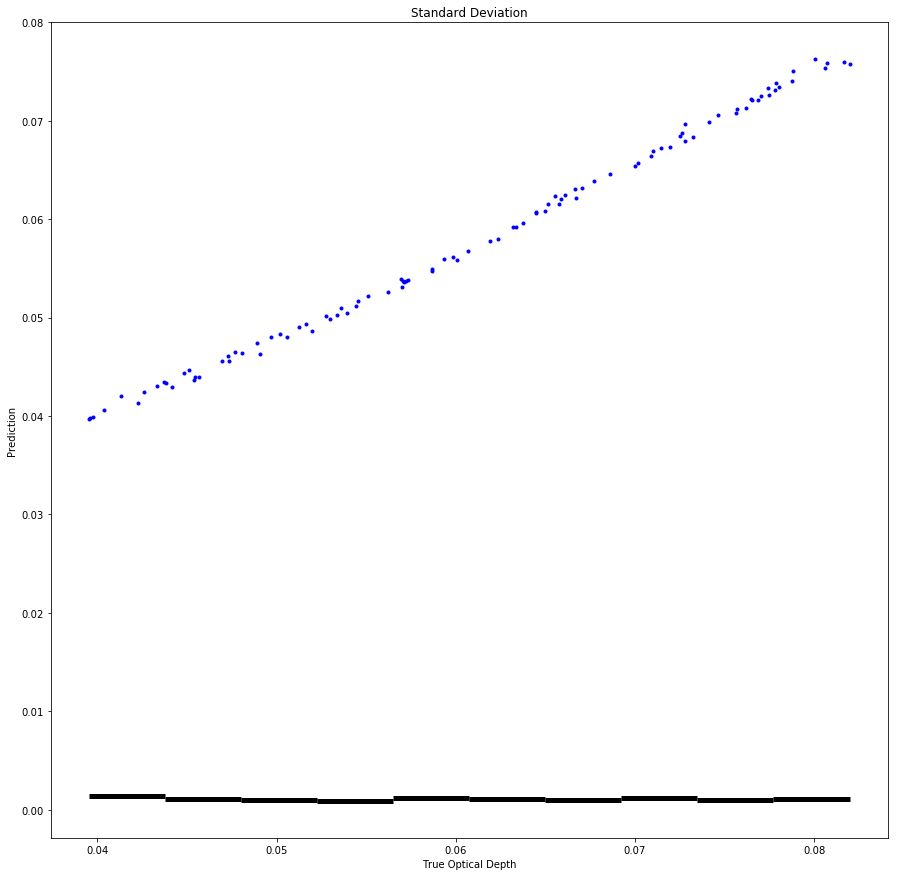

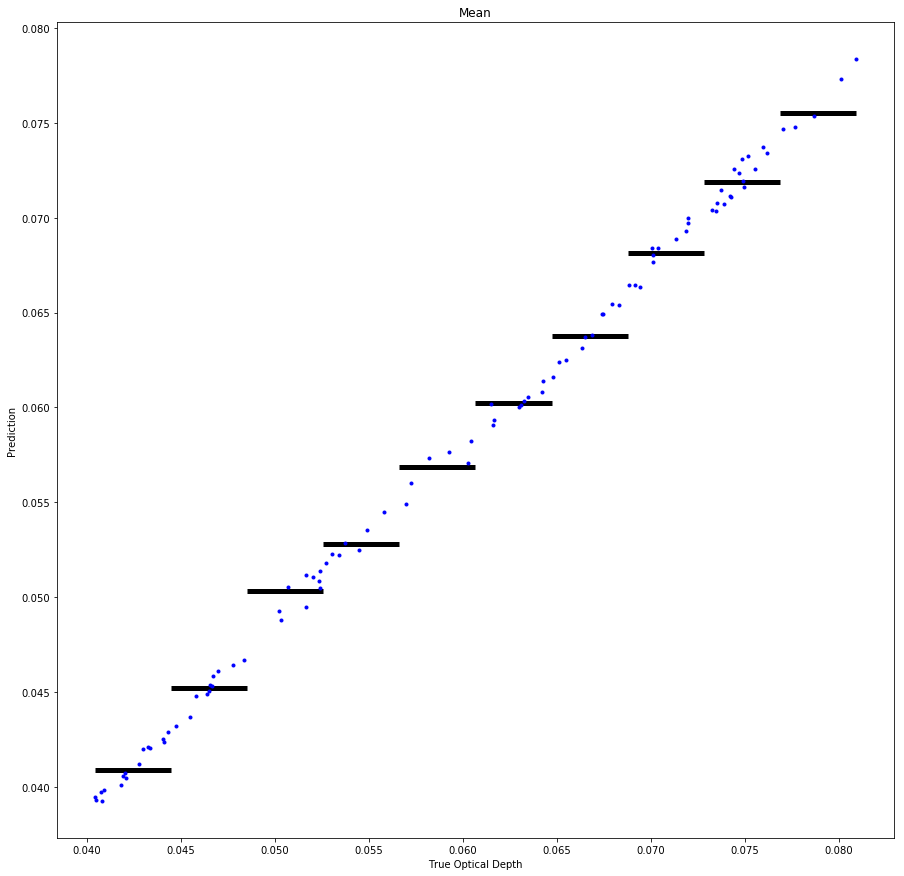

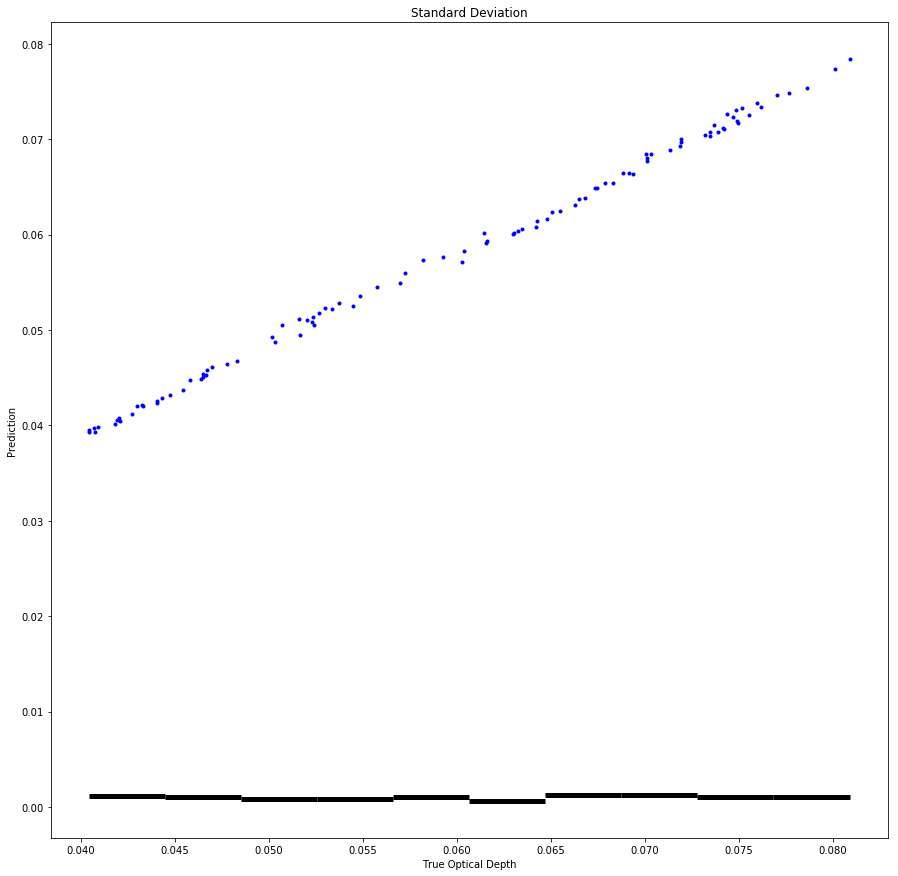

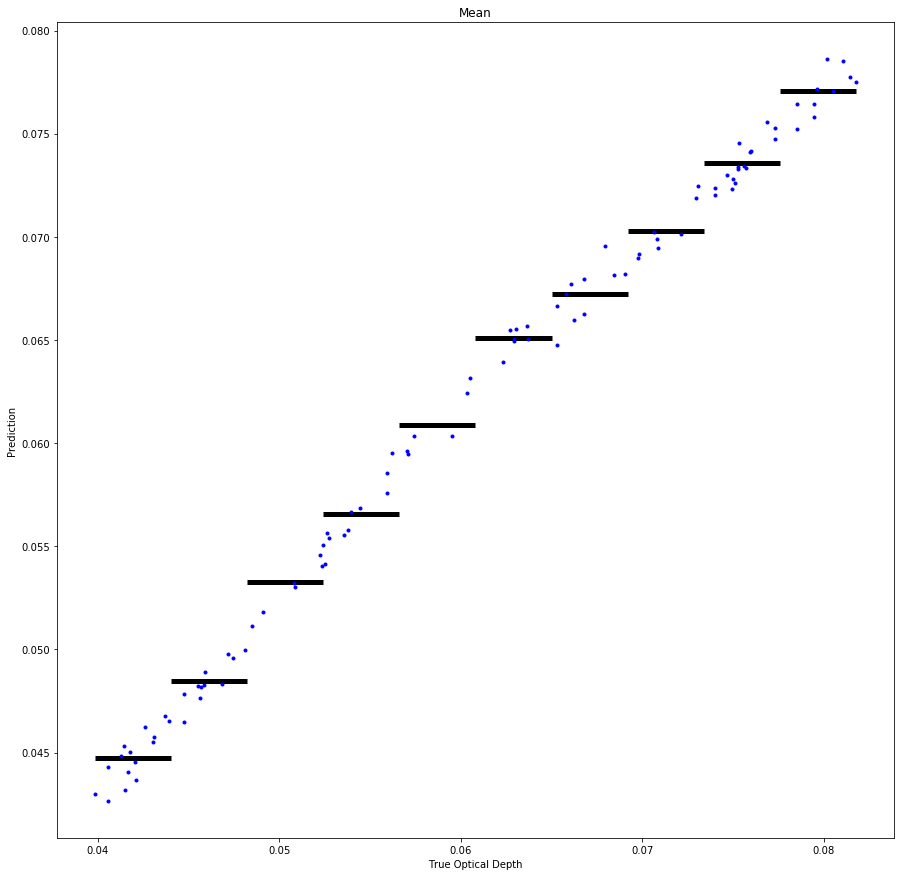

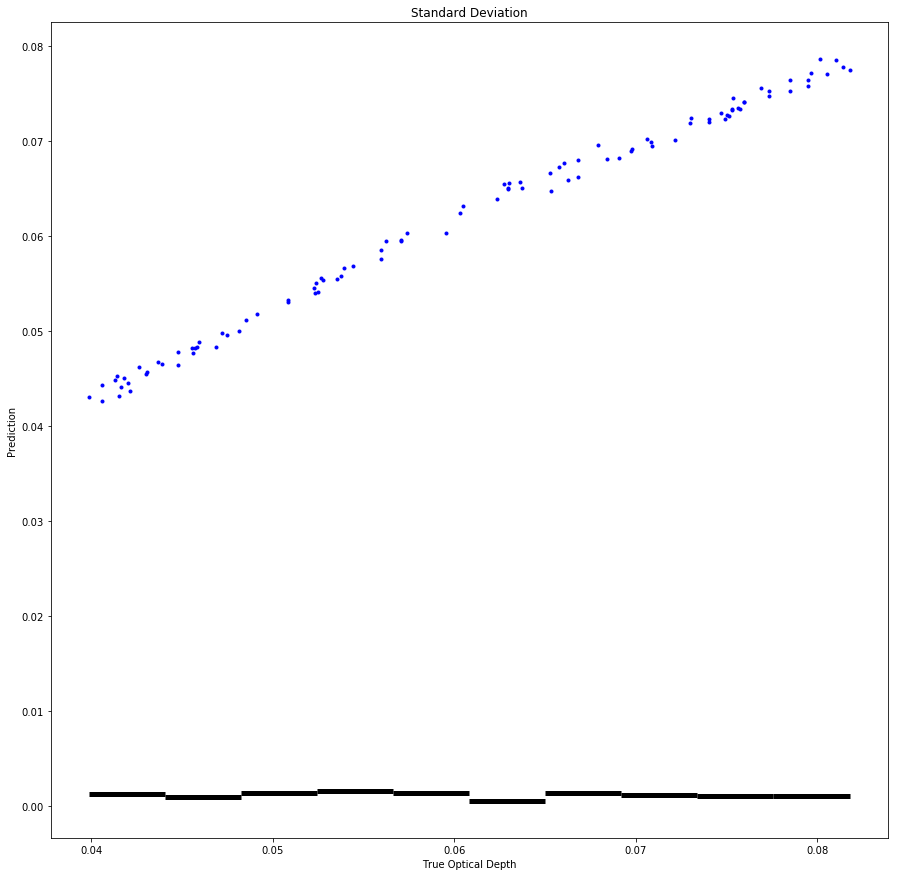

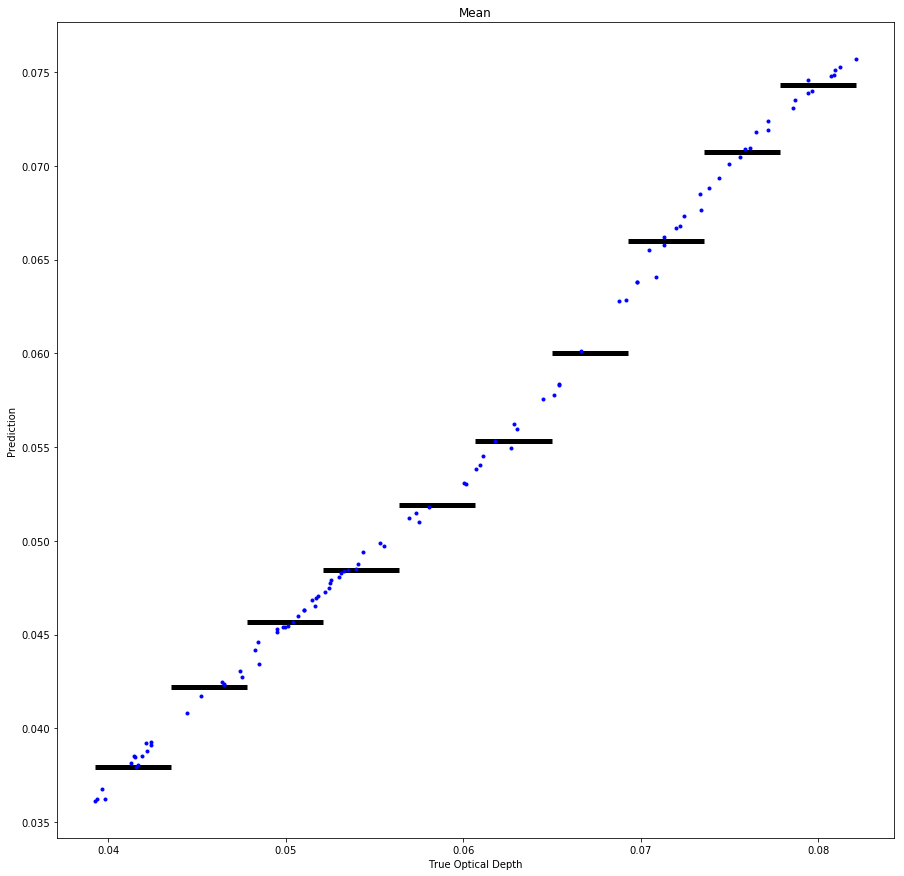

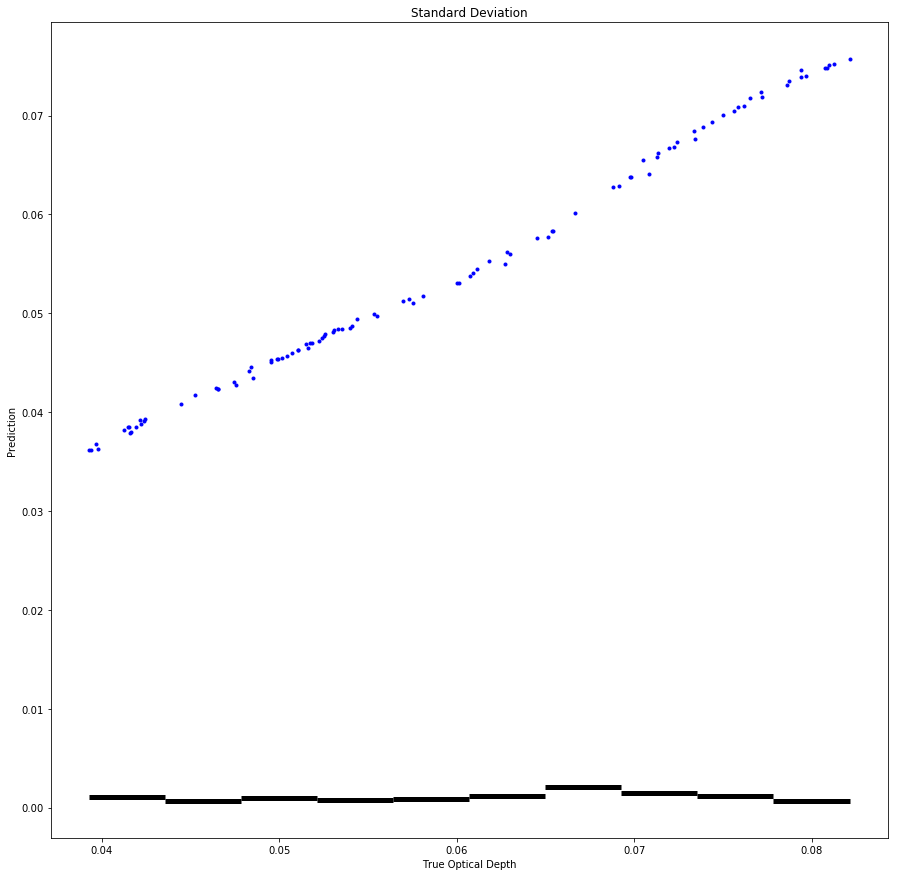

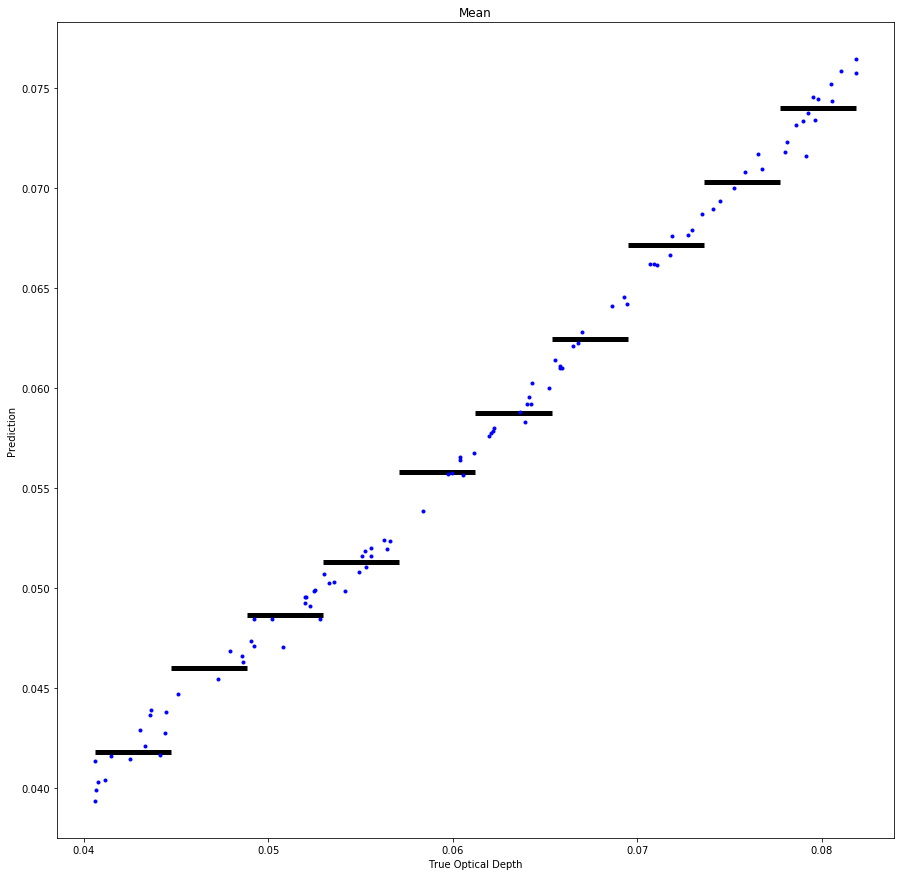

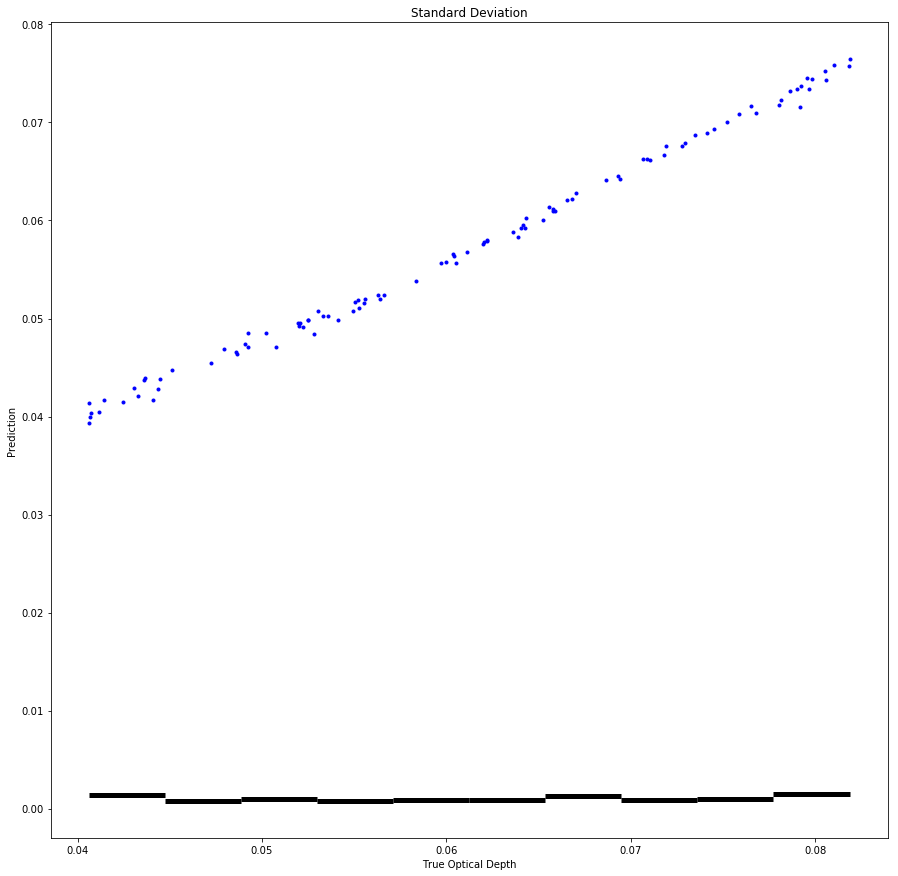

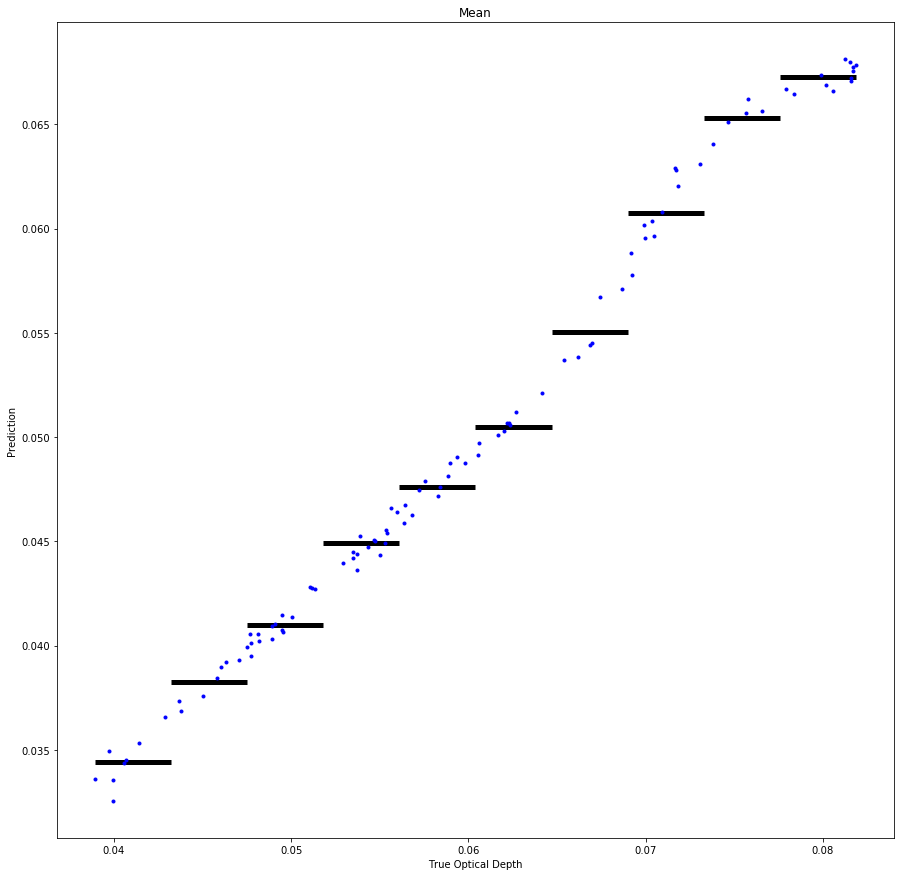

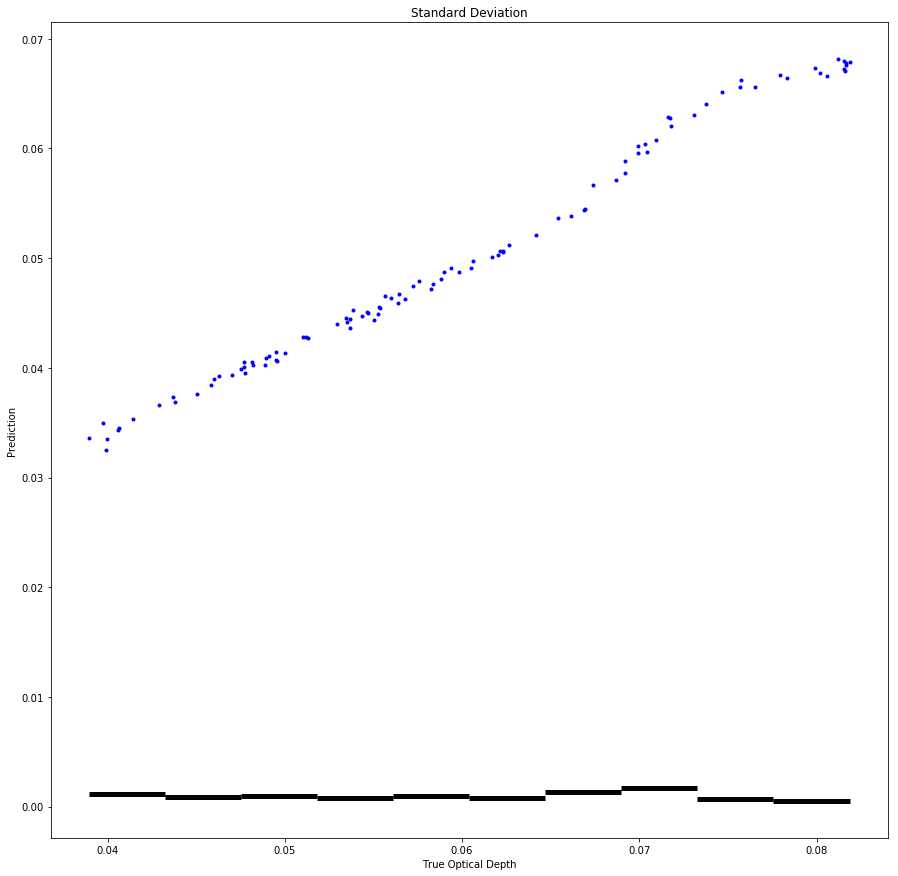

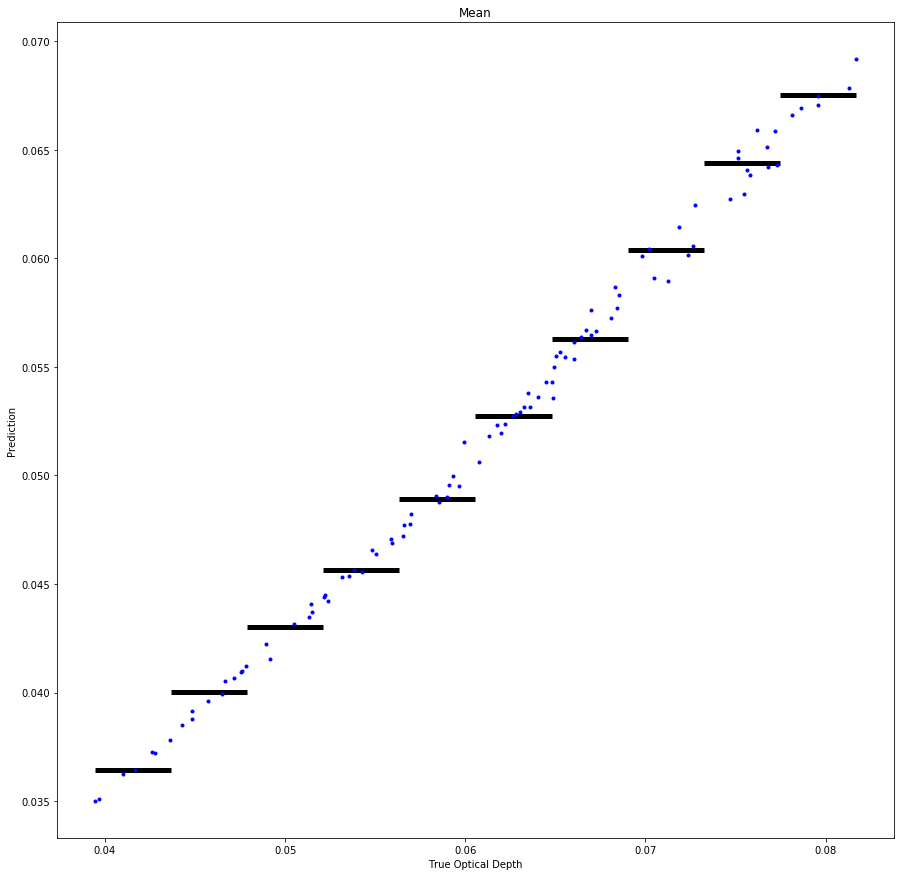

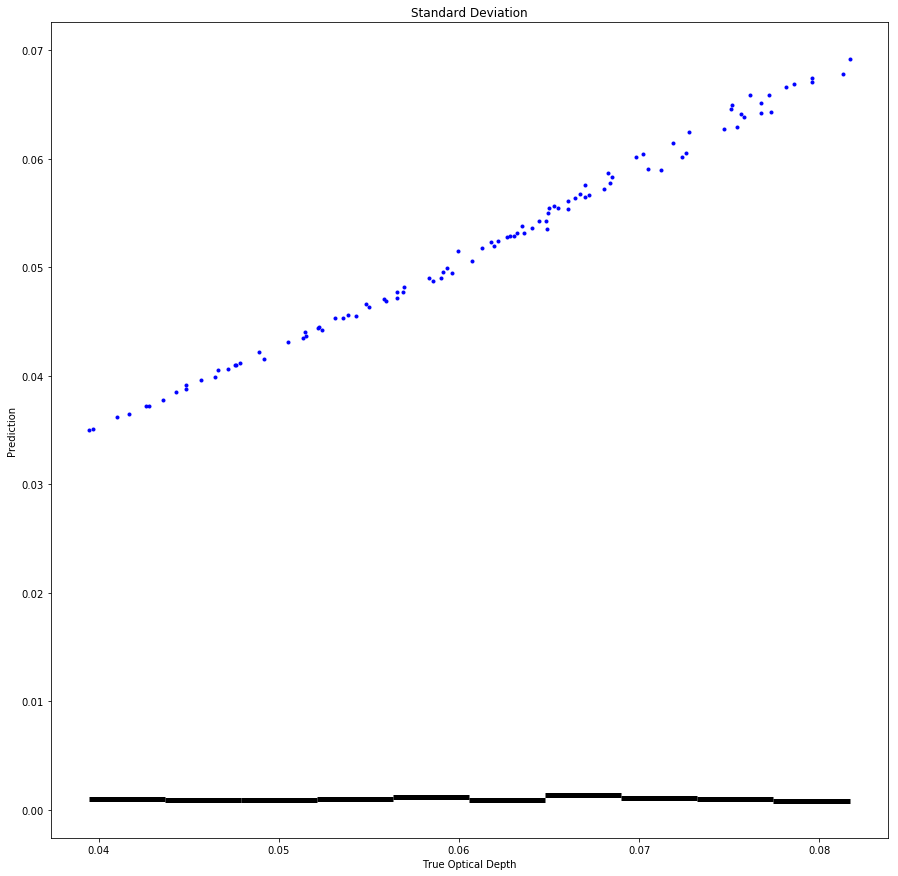

In [85]:
def read_results(filename):

    #read in file
    result=np.load(filename)
    truth = (result["truth"][:,n]/factor)[:5*20]
    prediction = (result["prediction"][:,n]/factor)[:5*20]

    return [truth, prediction]


def plot_true_tau_stats(filename):
    x = read_results("/pylon5/as5phnp/tbilling/data/t21_snapshots_nowedge_v9.hdf5")[0]
    
    # Statistical Estimates
    nobs, minmax, mean, variance, skewness, kurtosis = stats.describe(x)
    stat_vlaues = np.array(minmax , mean, variance, skewness)
    
    plt.text(5.0, 0.2, r'$\mu$ vector [minmax , mean, variance, skewness]: '+str(stat_vlaues),
            {'color': 'blue', 'fontsize': 10, 'ha': 'center', 'va': 'center',
            'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    
    # putting labels
    plt.xlabel('True Optical Depth')
    plt.ylabel('Prediction')
    
    # Show plot
    plt.show()

    return
    
def plot_stat_bins(x,y, fold):
    # x are the predicted values for a fold
    
    # Plotting the mean per bin
    bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=10)
    
    plt.figure(figsize=(15,15))
    plt.title("Mean")
    plt.plot(x,y, 'b.', label='Raw Data')
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,label='Binned Statistic of Data')
    
    # putting labels
    plt.xlabel('True Optical Depth')
    plt.ylabel('Prediction')
    
    # Show plot
    plt.show()
    
    # Plotting the standard deviation per bin
    plt.figure(figsize=(15,15))
    plt.title("Standard Deviation")
    bin_means, bin_edges, binnumber = stats.binned_statistic(x,y, statistic='std', bins=10)
    plt.plot(x,y, 'b.', label='Raw Data')
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,label='Binned Statistic of Data')
    
    # putting labels
    plt.xlabel('True Optical Depth')
    plt.ylabel('Prediction')
    
    # Show plot
    plt.show()
    
    return
    

def main(filename,fold):
    # Read in observations
    x = read_results(filename)[0]
    y = read_results(filename)[1]

    # PLot bin statistics
    plot_stat_bins(x=x,y=y, fold=fold)
    return

if __name__ == "__main__":

    for r, res in enumerate(results):
        main(filename=res,fold=r)
    #plot_true_tau_stats()

